In [29]:
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"   # see issue #152
os.environ["CUDA_VISIBLE_DEVICES"]="0"


In [60]:
import numpy as np
import pandas as pd
import torch
import matplotlib.pyplot as plt
import umap
import os
import seaborn as sb
from sklearn.preprocessing import StandardScaler
import umap
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
cmap = cm.nipy_spectral
from sklearn.decomposition import PCA


In [3]:
df = pd.read_csv('/scr/mdoron/Dino4Cells/data/fixed_size_masked_single_cells_A549_master.csv')

In [4]:
features_old = '/scr/mdoron/Dino4Cells/models/with-norm-fixed-masked-mom-0.996-epoch-100_A549_reproduction_exact_old_code/features.pth'
features_new = '/scr/mdoron/Dino4Cells//exp02_reproduction/features.pth'
f1,p1,c1,i1 = torch.load(features_old)
f2,p2,c2,i2 = torch.load(features_new)


In [5]:
pd.DataFrame(i1)[0].isin(df.ID).mean()

1.0

In [64]:
def load_and_project(path):
    data = torch.load(path)
    reducer = umap.UMAP()
    embedding = reducer.fit_transform(data[0])
    plt.figure(figsize=(6,6))
    plt.scatter(embedding[:,0], embedding[:,1], s=1)
    plt.axis('off')
    plt.show()
    return data[0], embedding

def load_and_project_rep(path, indices):
    data = torch.load(path)
    reducer = umap.UMAP(random_state=0)
    embedding = reducer.fit_transform(np.array(data[0])[indices])
    plt.figure(figsize=(6,6))
    plt.scatter(embedding[:,0], embedding[:,1], s=2)
    plt.axis('off')
    plt.show()
    return data[0], embedding

def load_and_project_michael(path):
    data = torch.load(path)
    reducer = umap.UMAP(random_state=0, init='random')
    scaled_features = StandardScaler().fit_transform(data[0])
    embedding = reducer.fit_transform(scaled_features)
    plt.figure(figsize=(6,6))
    plt.scatter(embedding[:,0], embedding[:,1], s=2)
    plt.axis('off')
    plt.show()
    return data[0], embedding


def load_and_project_pca(path):
    data = torch.load(path)
    reducer = umap.UMAP(random_state=0, init='random')
    scaled_features = StandardScaler().fit_transform(data[0])
    pca = PCA(n_components=scaled_features.shape[1])
    scaled_features = pca.fit_transform(scaled_features)
    embedding = reducer.fit_transform(scaled_features)
    plt.figure(figsize=(6,6))
    plt.scatter(embedding[:,0], embedding[:,1], s=2)
    plt.axis('off')
    plt.show()
    return data[0], embedding


In [39]:
umap.__version__

'0.5.3'

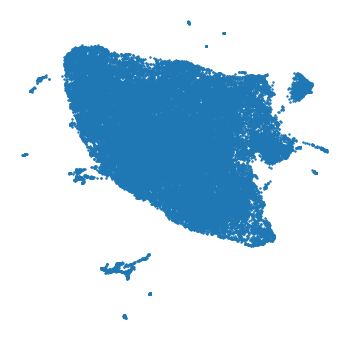

In [34]:
filename = '/scr/mdoron/Dino4Cells/exp02_reproduction_large_batch_size/features.pth'
# _, embedding = load_and_project(filename)
_, embedding_representative = load_and_project_michael(filename)


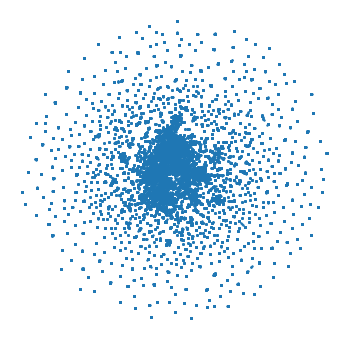

In [35]:
filename = '/scr/mdoron/Dino4Cells/exp02_reproduction/features.pth'
# _, embedding = load_and_project(filename)
_, embedding_representative = load_and_project_michael(filename)


(45138, 384)

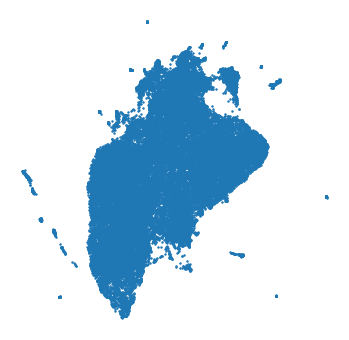

In [65]:
filename = '/scr/mdoron/Dino4Cells/exp02_reproduction_large_batch_size/features.pth'
# _, embedding = load_and_project(filename)
_, embedding_representative = load_and_project_pca(filename)


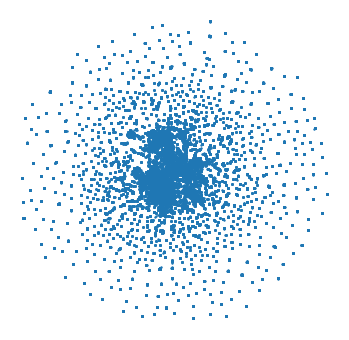

In [66]:
filename = '/scr/mdoron/Dino4Cells/exp02_reproduction/features.pth'
# _, embedding = load_and_project(filename)
_, embedding_representative = load_and_project_pca(filename)


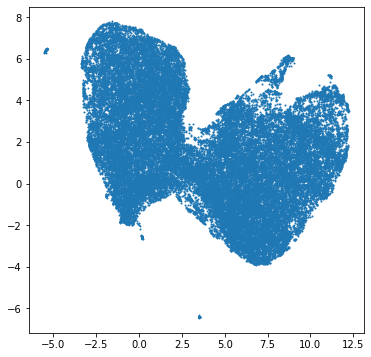

In [140]:
_, embedding_branch_large = load_and_project('/scr/mdoron/Dino4Cells//exp02_reproduction_large_batch_size/features.pth')



In [139]:
torch.load('/scr/mdoron/Dino4Cells//exp02_reproduction_large_batch_size/features.pth')[0].shape

torch.Size([45138, 384])

In [ ]:
_, embedding_high_momentum = load_and_project('/scr/mdoron/Dino4Cells//center_momentum_0.998/features.pth')



In [ ]:
embedding = embedding_high_momentum
a,b,c,d = torch.load('/scr/mdoron/Dino4Cells//center_momentum_0.998/features_all_data.pth')
protein_matrix = torch.stack(b)

fig, axes = plt.subplots(1,2, figsize=(20,10))
for i in range(28):
    indices = np.where((protein_matrix[:,i]).bool() & ((protein_matrix.sum(axis=1) == 1)))[0]
    axes[0].scatter(embedding_high_momentum[indices,0], 
                    embedding_high_momentum[indices,1], s=0.5,
               color=cmap(float(i / 28)),)
    axes[1].scatter(embedding_branch_large[indices,0], 
                    embedding_branch_large[indices,1], s=0.5,
               color=cmap(float(i / 28)),)
    axes[0].axis('off')
    axes[1].axis('off')    
    axes[0].set_title('64 effective bs\n0.998 center momentum')
    axes[1].set_title('768 effective bs\n0.9 center momentum')

In [14]:
a,b,c,d = torch.load('/scr/mdoron/Dino4Cells//center_momentum_0.998/features_all_data.pth')


In [15]:
a = a.numpy()
a.shape

(629694, 384)

In [16]:
protein_matrix = torch.stack(b)
reducer = umap.UMAP(init='random')
scaled_features = StandardScaler().fit_transform(a)
embedding = reducer.fit_transform(scaled_features)


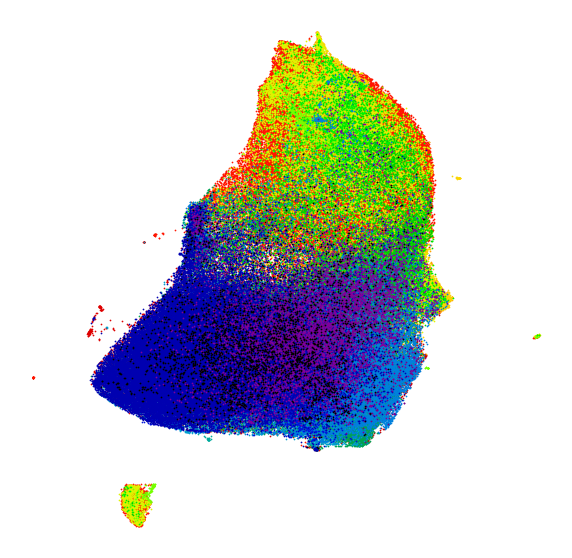

In [22]:
fig, axes = plt.subplots(1,1, figsize=(10,10))
for i in range(19)[::-1]:
    indices = np.where((protein_matrix[:,i]).bool() & ((protein_matrix.sum(axis=1) == 1)))[0]
    axes.scatter(embedding[indices,0], 
                    embedding[indices,1], s=0.5,
               color=cmap(float(i / 19)),)
    axes.axis('off')


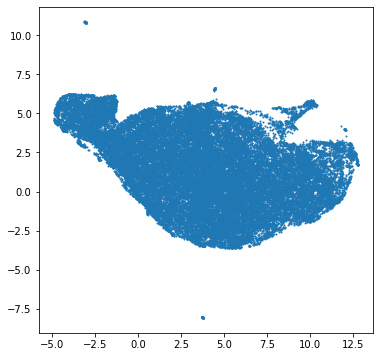

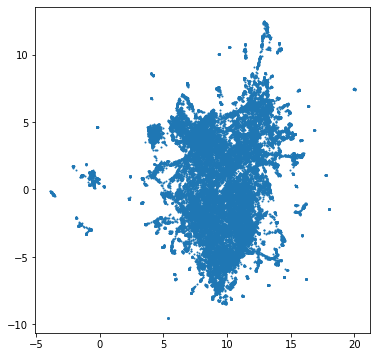

In [15]:
features_old = '/scr/mdoron/Dino4Cells//exp02_reproduction_large_batch_size/features.pth'
features_new = '/scr/mdoron/Dino4Cells//exp02_reproduction/features.pth'
_, embedding_large = load_and_project(features_old)
_, embedding_small = load_and_project(features_new)


Text(0.5, 1.0, '1 GPUs, 64 bs')

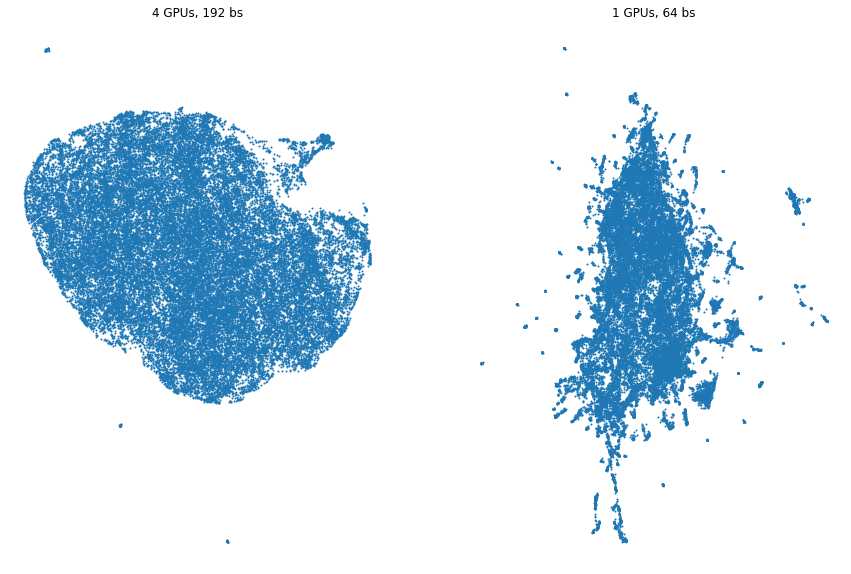

In [72]:
fig, axes = plt.subplots(1,2,figsize=(15,10))
axes[0].scatter(embedding_large[:,0], embedding_large[:,1], s=1)
axes[1].scatter(embedding_small[:,0], embedding_small[:,1], s=1)
axes[0].axis('off')
axes[1].axis('off')
axes[0].set_title('4 GPUs, 192 bs')
axes[1].set_title('1 GPUs, 64 bs')

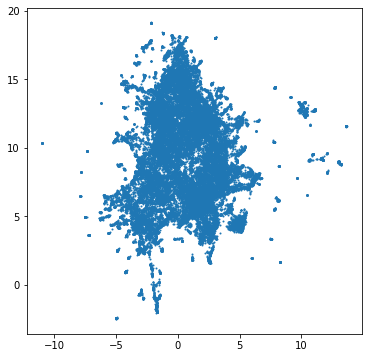

In [43]:
_, embedding = load_and_project('/scr/mdoron/Dino4Cells//exp02_reproduction/features.pth')


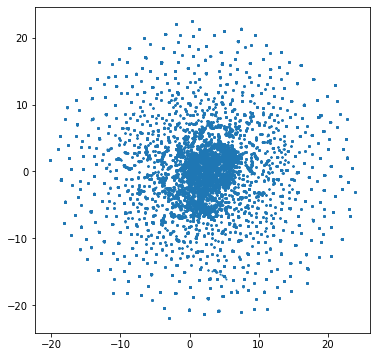

In [14]:
_, embedding_main = load_and_project('/scr/mdoron/Dino4Cells/exp02_reproduction//features.pth')


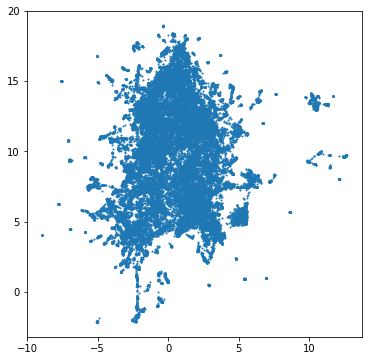

In [15]:
_, embedding_branch = load_and_project('/scr/mdoron/Dino4Cells/exp02_reproduction//features_branch.pth')


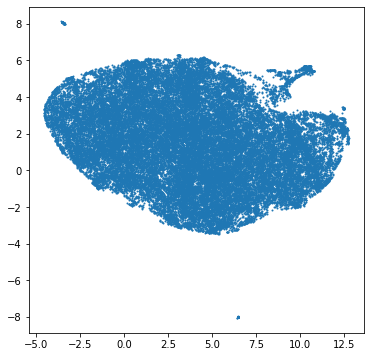

In [16]:
_, embedding_branch_large = load_and_project('/scr/mdoron/Dino4Cells/exp02_reproduction_large_batch_size///features_branch.pth')


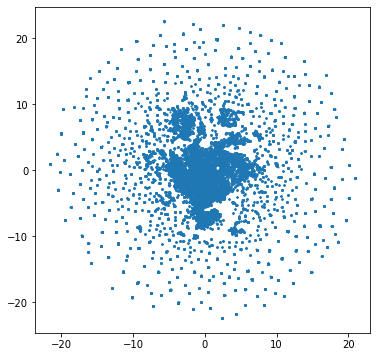

In [17]:
_, embedding_main_large = load_and_project('/scr/mdoron/Dino4Cells/exp02_reproduction_large_batch_size///features.pth')


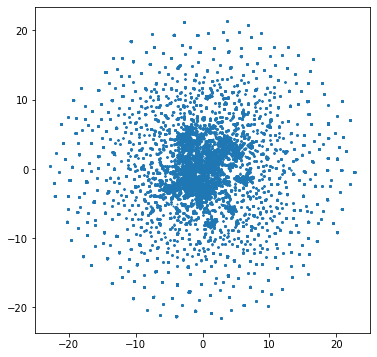

In [64]:
_, embedding_branch_balance = load_and_project('/scr/mdoron/Dino4Cells/exp02_reproduction/features.pth')


/scr/mdoron/miniconda3/lib/python3.9/site-packages/sklearn/manifold/_spectral_embedding.py:259: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


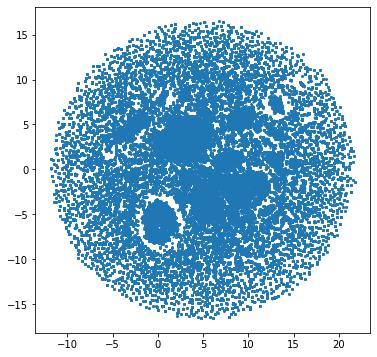

In [70]:
_, embedding_all = load_and_project('/scr/mdoron/Dino4Cells/models/without-norm-varied-masked-mom-0.996-epoch-100_vit_base_HPA/features.pth')



In [78]:
protein_matrix.shape

torch.Size([629694, 19])

In [73]:
df = pd.read_csv('/scr/mdoron/Dino4Cells/data/fixed_size_masked_single_cells_for_sc.csv')

(-13.524886178970338,
 23.43894009590149,
 -18.170816516876222,
 18.109371280670167)

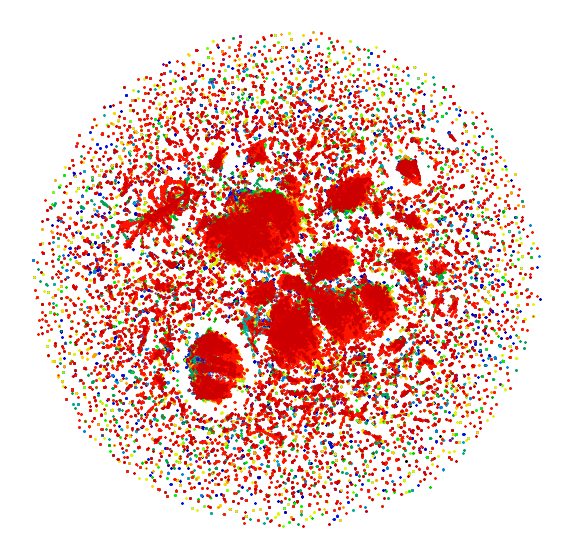

In [79]:
a,b,c,d = torch.load('/scr/mdoron/Dino4Cells/models/without-norm-varied-masked-mom-0.996-epoch-100_vit_base_HPA/features.pth')
protein_matrix = torch.stack(b)

plt.figure(figsize=(10,10))
for i in range(19):
    indices = np.where(protein_matrix[:,i])[0]
    plt.scatter(embedding_all[indices,0], embedding_all[indices,1], s=0.5,
               color=cmap(float(i / 19)),)
plt.axis('off')



Text(0.5, 1.0, 'single_cell_evaluation\nwithout class balancing')

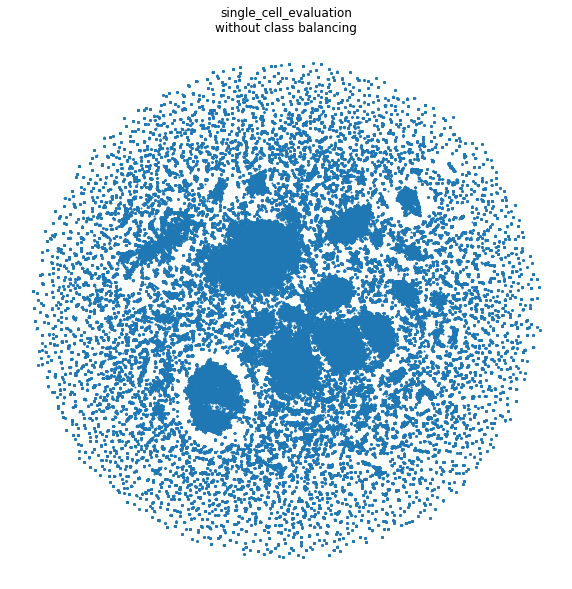

In [72]:
fig, axes = plt.subplots(1,1,figsize=(10,10))
axes.scatter(embedding_all[:,0], embedding_all[:,1], s=1)
axes.axis('off')
axes.set_title('single_cell_evaluation\nwithout class balancing')

Text(0.5, 1.0, '1 GPUs, 64 bs\nsingle_cell_evaluation, without class balancing')

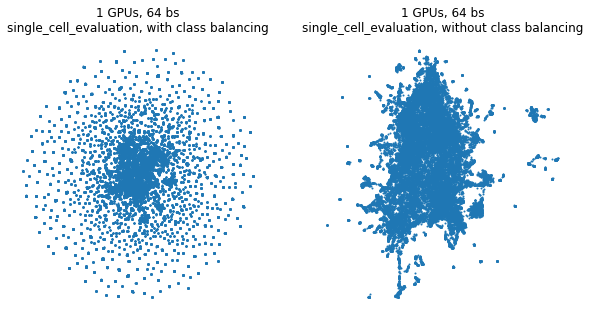

In [80]:
fig, axes = plt.subplots(1,2,figsize=(10,5))
axes[0].scatter(embedding_branch_balance[:,0], embedding_branch_balance[:,1], s=1)
axes[1].scatter(embedding_branch[:,0], embedding_branch[:,1], s=1)

axes[0].axis('off')
axes[1].axis('off')
axes[0].set_title('1 GPUs, 64 bs\nsingle_cell_evaluation, with class balancing')
axes[1].set_title('1 GPUs, 64 bs\nsingle_cell_evaluation, without class balancing')


Text(0.5, 1.0, '1 GPUs, 64 bs, main')

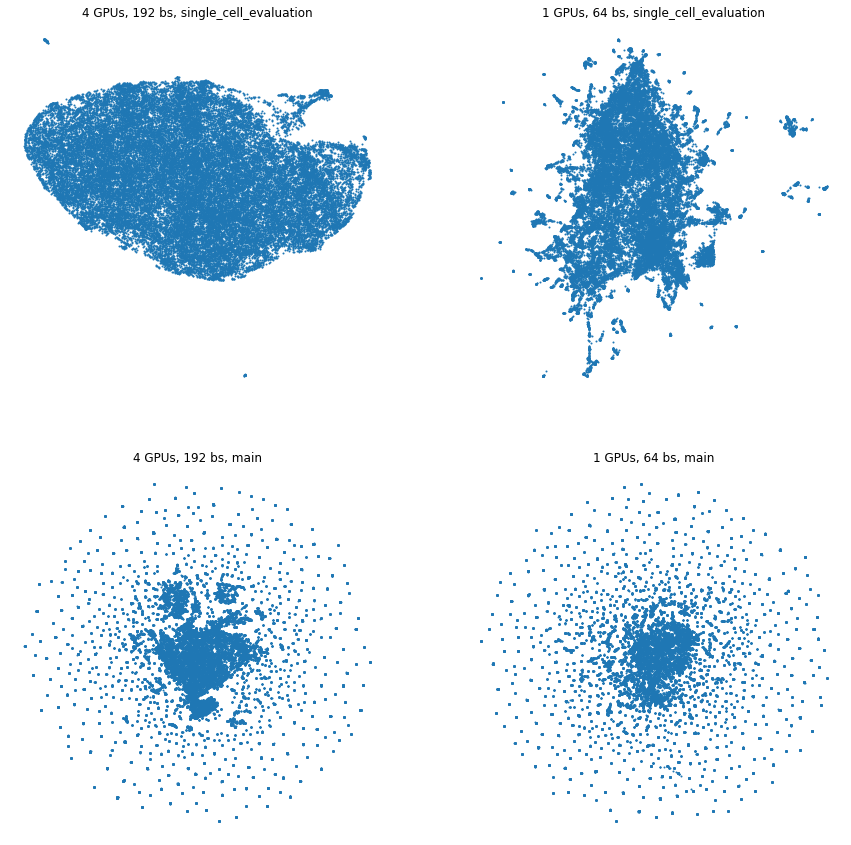

In [23]:
fig, axes = plt.subplots(2,2,figsize=(15,15))
axes[0][0].scatter(embedding_branch_large[:,0], embedding_branch_large[:,1], s=1)
axes[0][1].scatter(embedding_branch[:,0], embedding_branch[:,1], s=1)
axes[1][0].scatter(embedding_main_large[:,0], embedding_main_large[:,1], s=1)
axes[1][1].scatter(embedding_main[:,0], embedding_main[:,1], s=1)

axes[0][0].axis('off')
axes[1][0].axis('off')
axes[0][1].axis('off')
axes[1][1].axis('off')
axes[0][0].set_title('4 GPUs, 192 bs, single_cell_evaluation')
axes[0][1].set_title('1 GPUs, 64 bs, single_cell_evaluation')
axes[1][0].set_title('4 GPUs, 192 bs, main')
axes[1][1].set_title('1 GPUs, 64 bs, main')

In [24]:
f_branch,_,_,_ = torch.load('/scr/mdoron/Dino4Cells//exp02_reproduction/features_branch.pth')
f_main,_,_,_ = torch.load('/scr/mdoron/Dino4Cells//exp02_reproduction/features.pth')
f_branch_large,_,_,_ = torch.load('/scr/mdoron/Dino4Cells/exp02_reproduction_large_batch_size//features_branch.pth')
f_main_large,_,_,_ = torch.load('/scr/mdoron/Dino4Cells/exp02_reproduction_large_batch_size//features.pth')


(array([6.300000e+01, 2.663000e+03, 8.907600e+04, 1.231193e+06,
        4.911548e+06, 6.747258e+06, 3.639257e+06, 6.654390e+05,
        4.505900e+04, 1.436000e+03]),
 array([-6.1377845 , -4.9909644 , -3.844144  , -2.697324  , -1.5505038 ,
        -0.40368366,  0.7431365 ,  1.8899567 ,  3.0367768 ,  4.183597  ,
         5.330417  ], dtype=float32),
 <BarContainer object of 10 artists>)

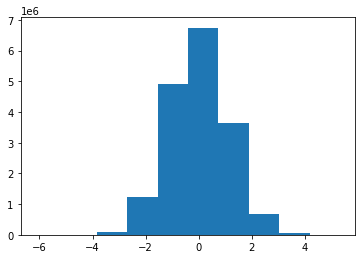

In [62]:
plt.hist(f_branch.detach().cpu().flatten())

(array([1.010000e+02, 3.614000e+03, 1.003880e+05, 1.219692e+06,
        4.883334e+06, 6.783506e+06, 3.627946e+06, 6.701000e+05,
        4.290200e+04, 1.409000e+03]),
 array([-6.1377845 , -4.9909644 , -3.844144  , -2.697324  , -1.5505038 ,
        -0.40368366,  0.7431365 ,  1.8899567 ,  3.0367768 ,  4.183597  ,
         5.330417  ], dtype=float32),
 <BarContainer object of 10 artists>)

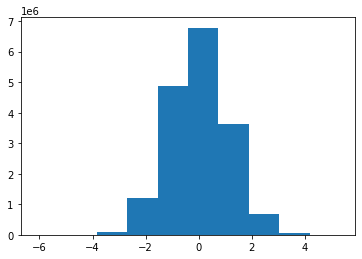

In [63]:
plt.hist(f_main.detach().cpu().flatten())

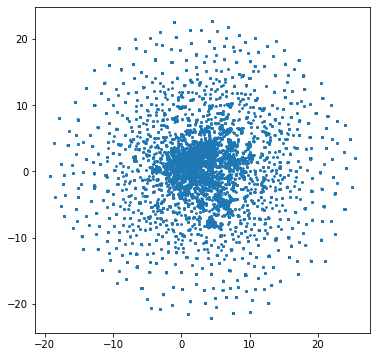

In [9]:
_, embedding = load_and_project('/scr/mdoron/Dino4Cells/models/with-norm-fixed-masked-mom-0.996-epoch-100_A549_reproduction_exact_old_code/features.pth')


/scr/mdoron/miniconda3/lib/python3.9/site-packages/sklearn/manifold/_spectral_embedding.py:374: UserWarning: Exited at iteration 71 with accuracies 
[3.34740550e-13 3.17045766e-05 4.45538840e-06 9.48187628e-06]
not reaching the requested tolerance 1e-05.
  _, diffusion_map = lobpcg(


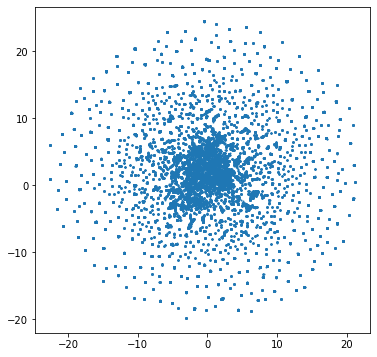

In [18]:
_, embedding = load_and_project('/scr/mdoron/Dino4Cells/models/with-norm-fixed-masked-mom-0.996-epoch-100_A549_reproduction_exact_old_code/features.pth')


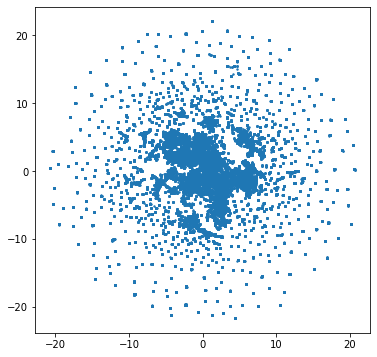

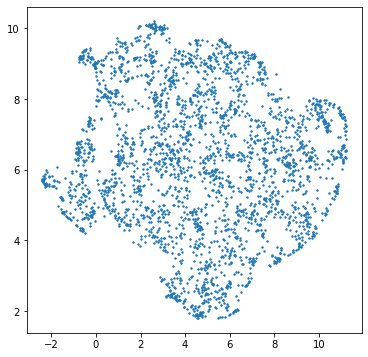

In [180]:
a,b,c,d = torch.load('/scr/mdoron/Dino4Cells/models/with-norm-fixed-masked-mom-0.996-epoch-100_A549_reproduction_exact_old_code/features.pth')
group_dict = pd.DataFrame(d, columns=['ID']).groupby('ID').groups
reps = {k : group_dict[k][0] for k in group_dict.keys()}
_, embedding = load_and_project('/scr/mdoron/Dino4Cells/models/with-norm-fixed-masked-mom-0.996-epoch-100_A549_reproduction_exact_old_code/features.pth')
_, embedding_representative = load_and_project_rep('/scr/mdoron/Dino4Cells/models/with-norm-fixed-masked-mom-0.996-epoch-100_A549_reproduction_exact_old_code/features.pth', np.stack(list(reps.values())))


In [201]:
a2,b2,c2,d2 = torch.load('/scr/mdoron/Dino4Cells/models/without-norm-fixed-masked-mom-0.996-epoch-100_A549_reproduction_exact_old_code/features.pth')

In [246]:
'10771_991_F2_2' in d2

False

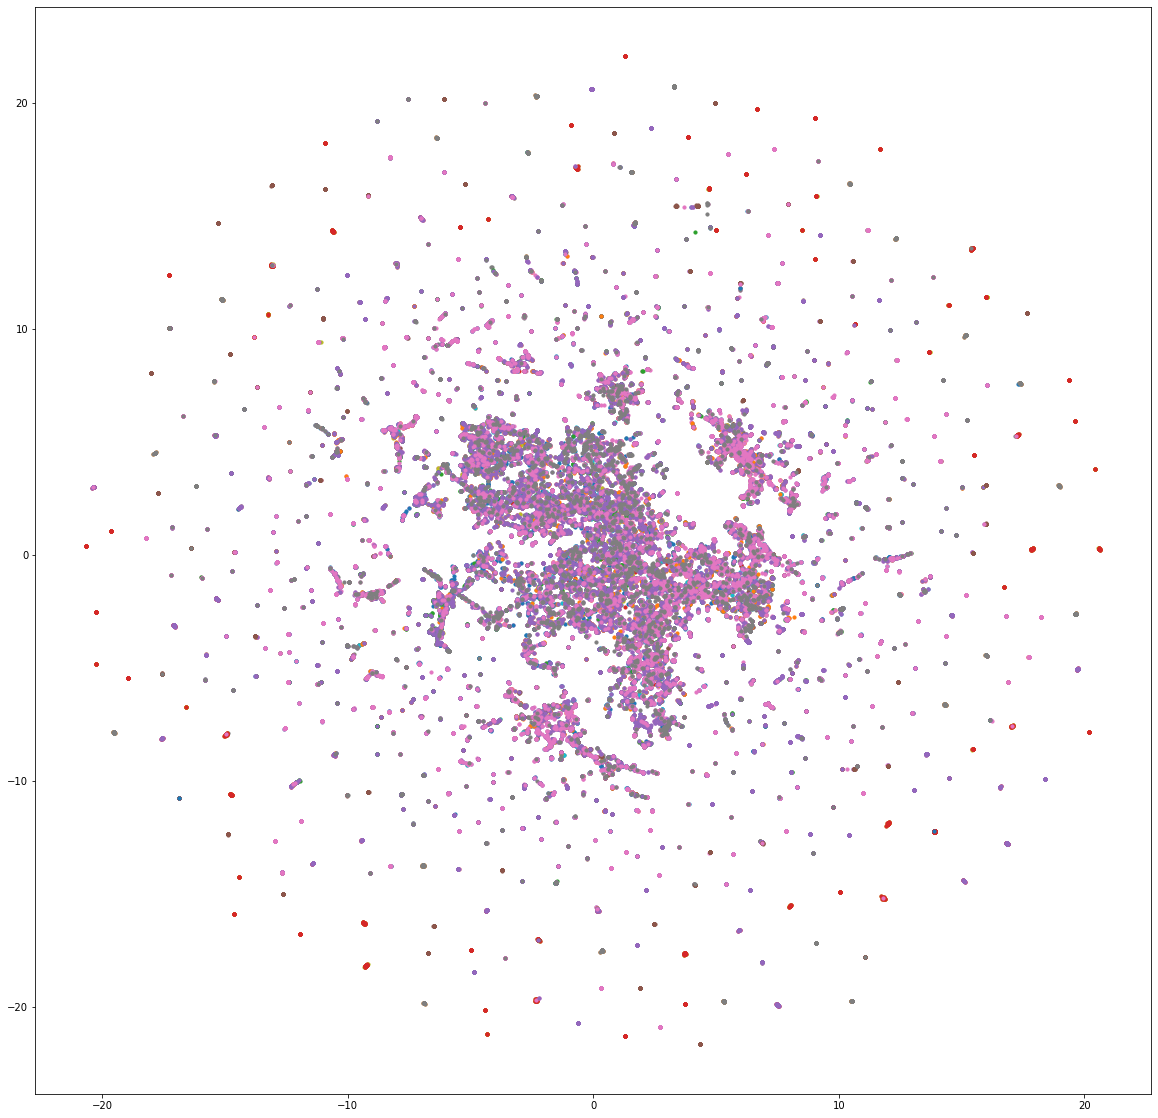

In [287]:
plt.figure(figsize=(20,20))
pro = protein_mat
for i in range(28):
    pro_indices = np.where(pro[:,i])[0]
    plt.scatter(embedding[pro_indices, 0],
                embedding[pro_indices, 1],
                   s=10)

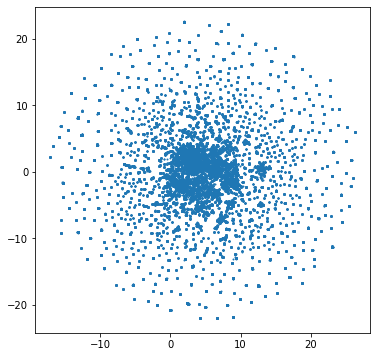

In [19]:
filename = '/scr/mdoron/Dino4Cells/models/with-norm-fixed-masked-mom-0.996-epoch-100_A549_reproduction_exact_old_code/features.pth'
_, embedding = load_and_project(filename)


In [20]:
f3,p3,c3,i3 = torch.load('/scr/mdoron/Dino4Cells/models/with-norm-fixed-masked-mom-0.996-epoch-100_A549_reproduction_exact_old_code/features.pth')

In [31]:
len(i2)

43317

/scr/mdoron/miniconda3/lib/python3.9/site-packages/umap/spectral.py:260: UserWarning: WARNING: spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(


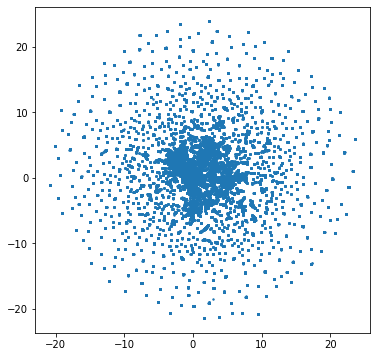

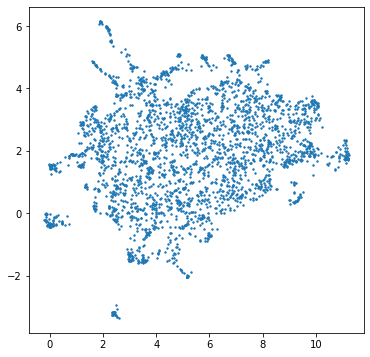

In [304]:
filename = '/scr/mdoron/Dino4Cells/models/with-norm-fixed-masked-mom-0.996-epoch-100_A549_reproduction_exact_old_code/features.pth'
a,b,c,d = torch.load(filename)
group_dict = pd.DataFrame(d, columns=['ID']).groupby('ID').groups
reps = {k : group_dict[k][0] for k in group_dict.keys()}
_, embedding = load_and_project(filename)
_, embedding_representative = load_and_project_rep(filename, np.stack(list(reps.values())))

a,b,c,d = torch.load(filename)
group_dict = pd.DataFrame(d, columns=['ID']).groupby('ID').groups
reps = {k : group_dict[k][0] for k in group_dict.keys()}

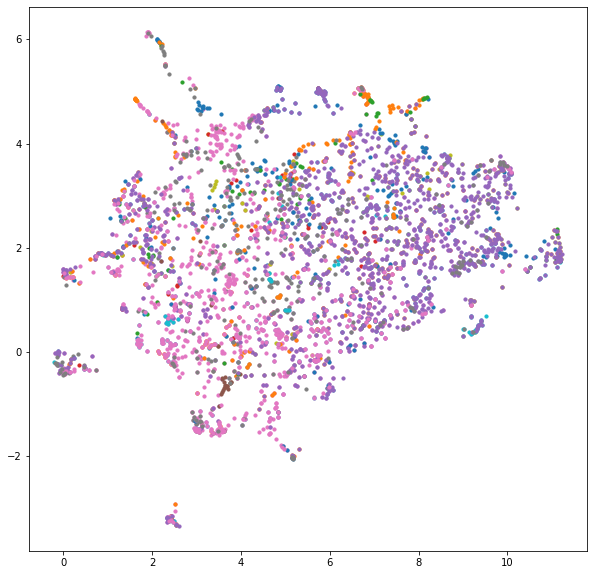

In [307]:
plt.figure(figsize=(10,10))
pro = protein_mat[np.stack(list(reps.values()))]
for i in range(28):
    pro_indices = np.where(pro[:,i])[0]
    plt.scatter(embedding_representative[pro_indices, 0],
                embedding_representative[pro_indices, 1],
                   s=10)

/tmp/ipykernel_2623399/3108463805.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(10,10))


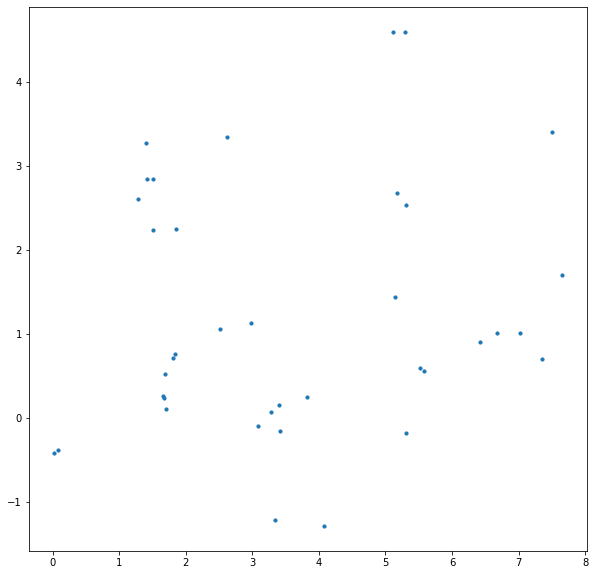

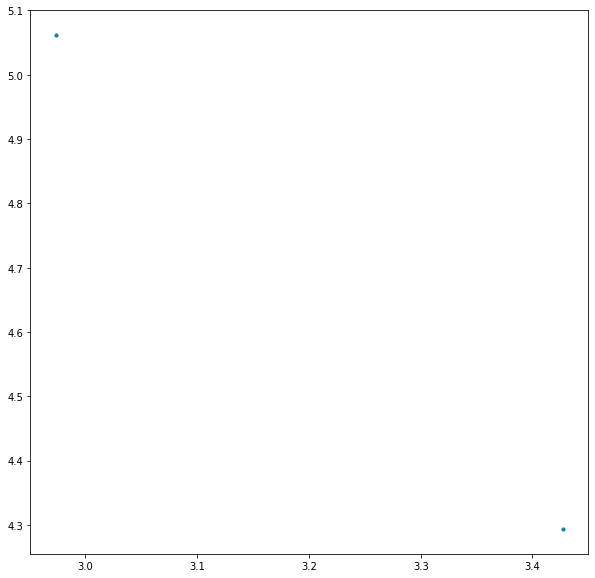

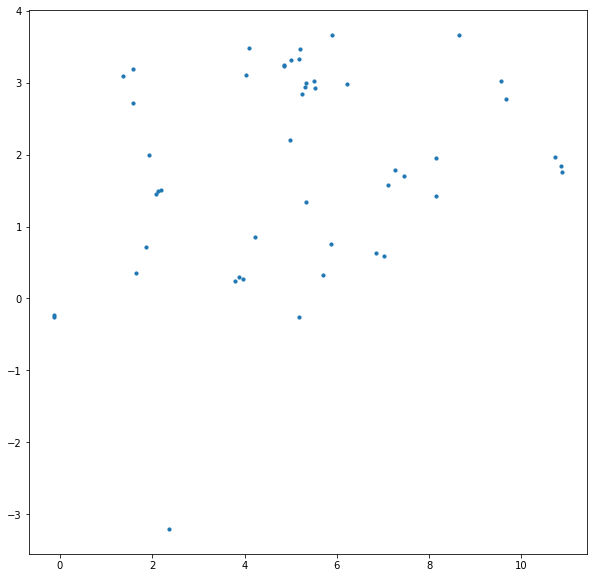

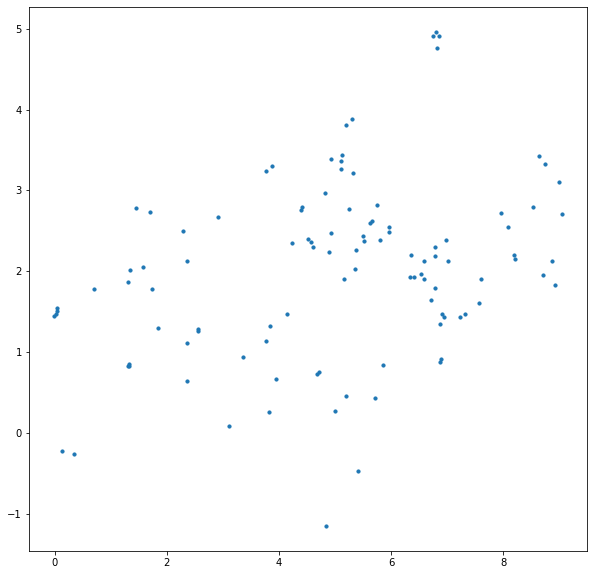

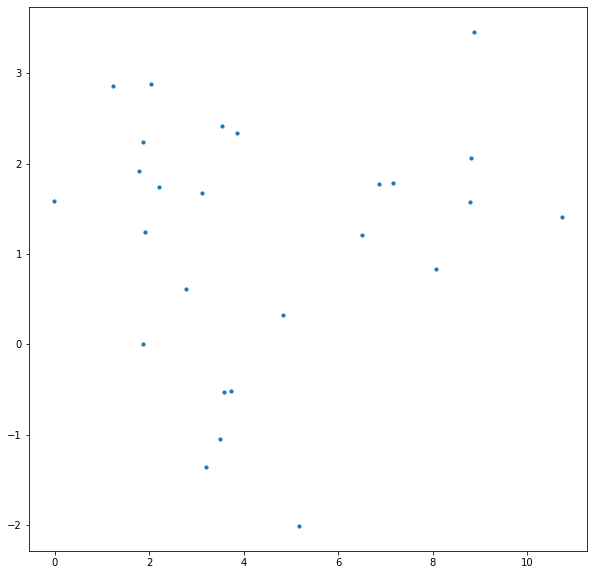

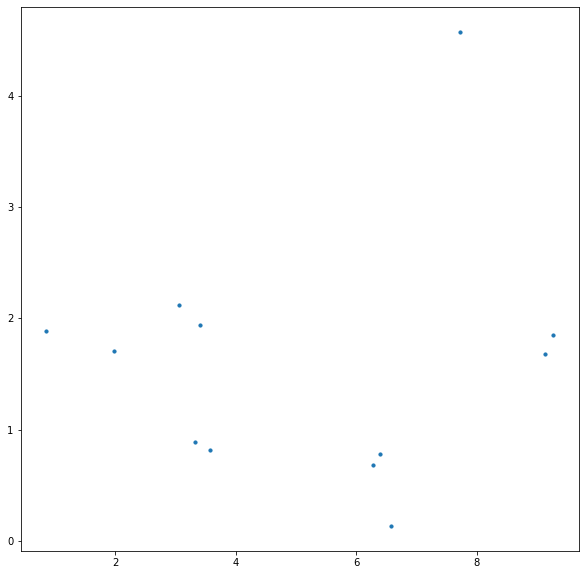

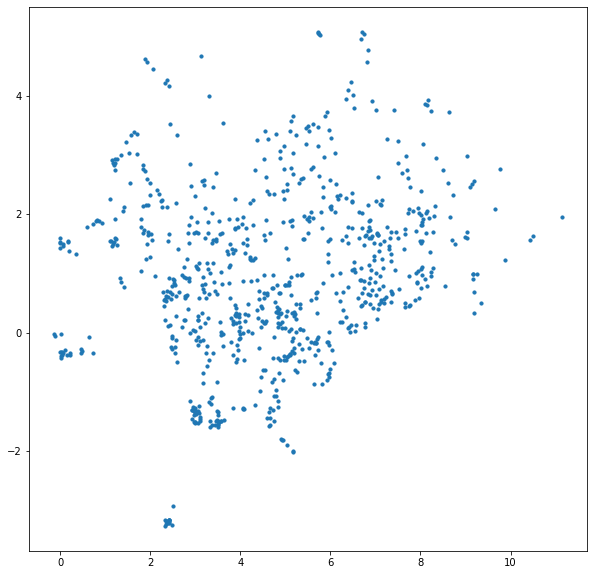

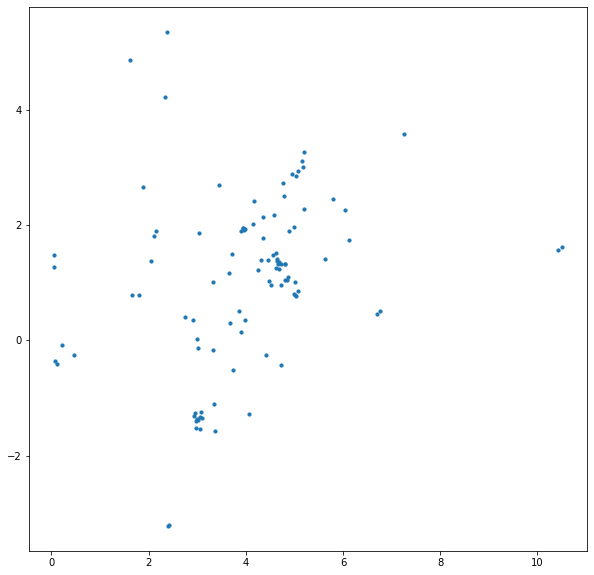

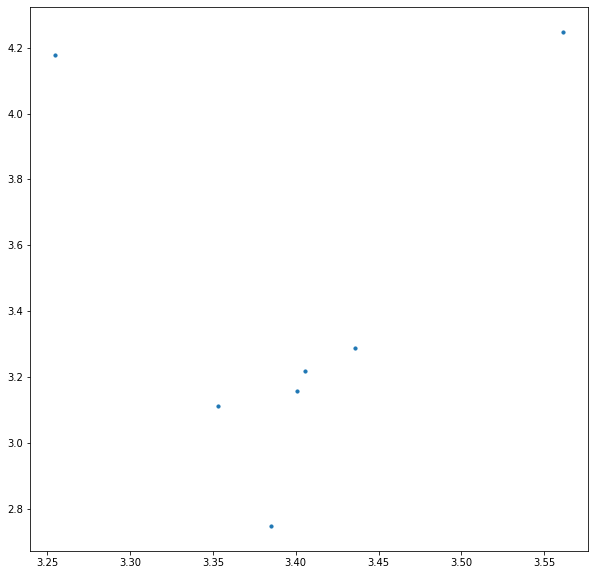

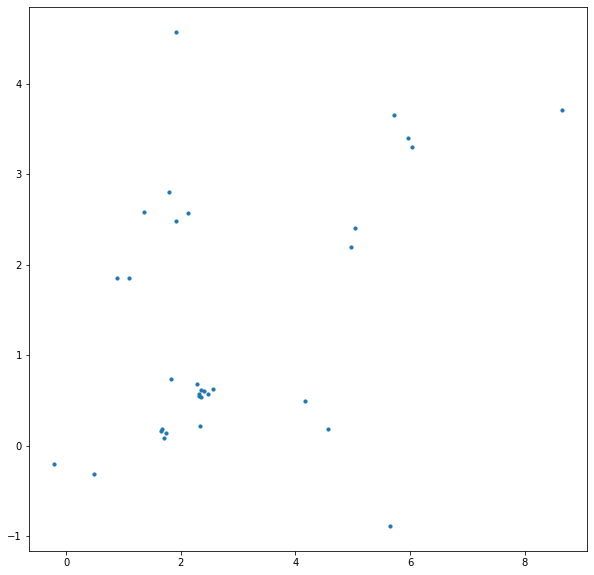

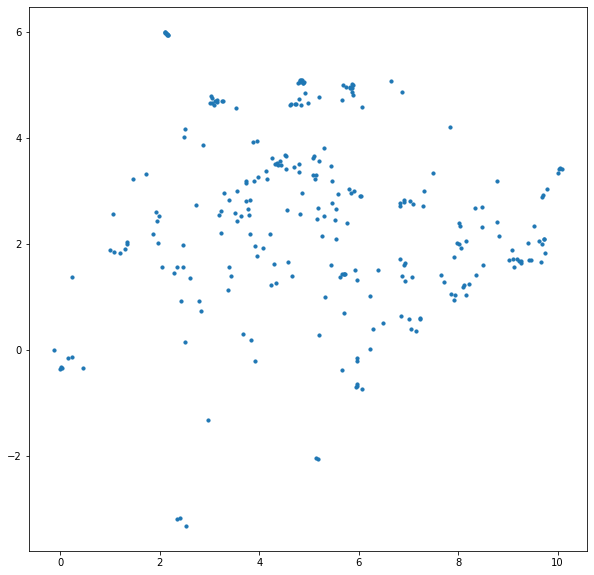

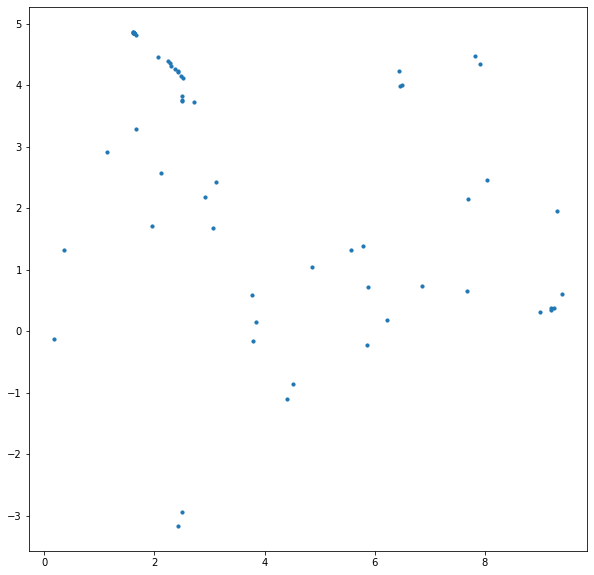

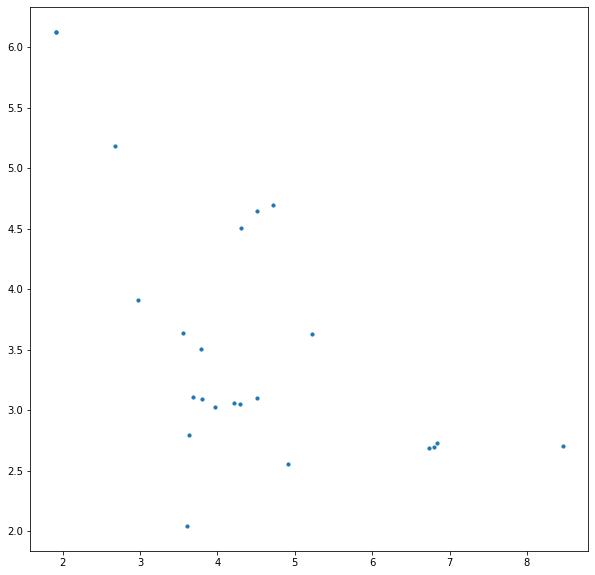

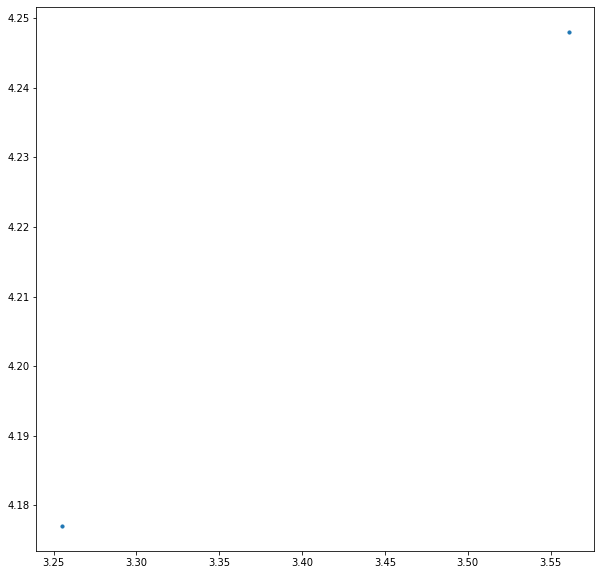

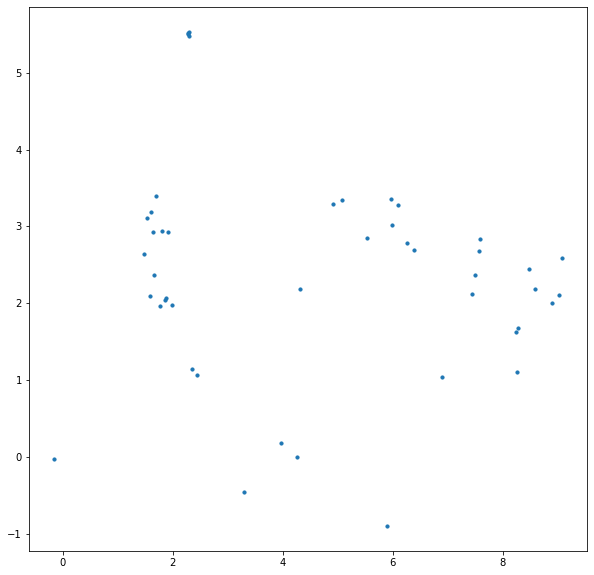

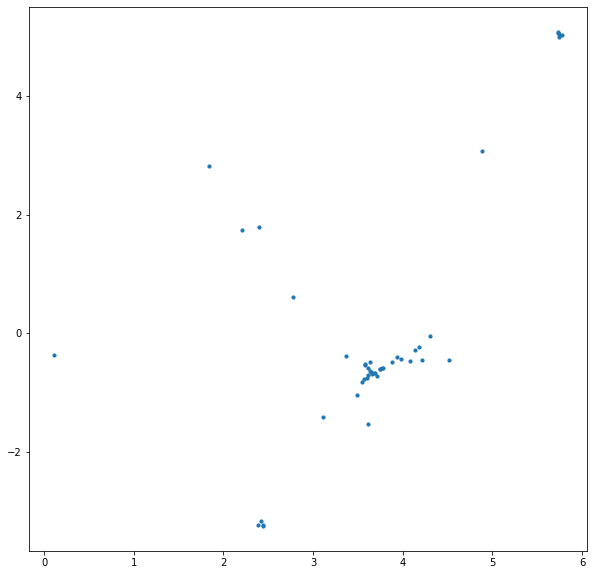

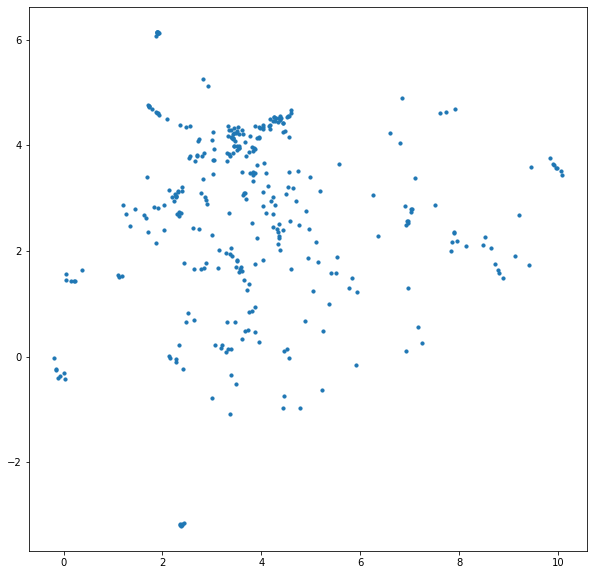

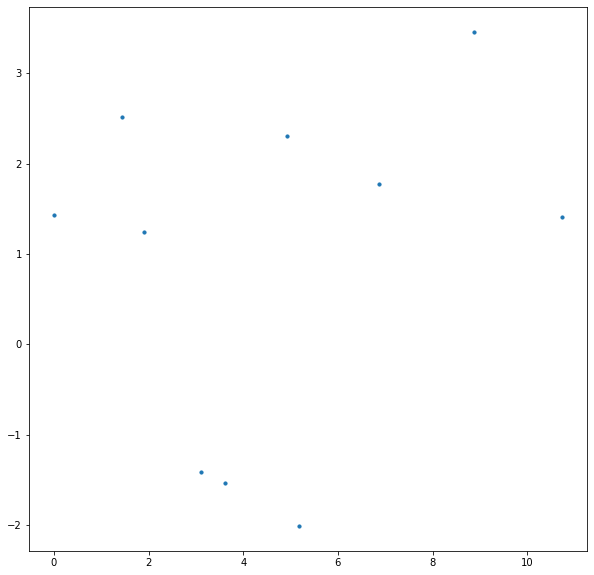

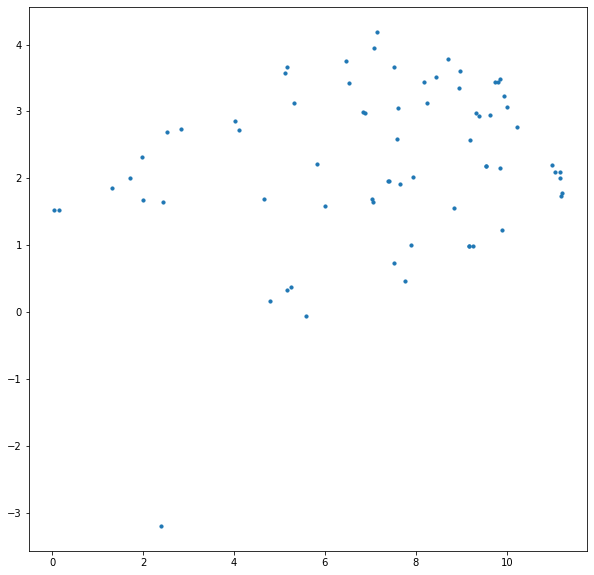

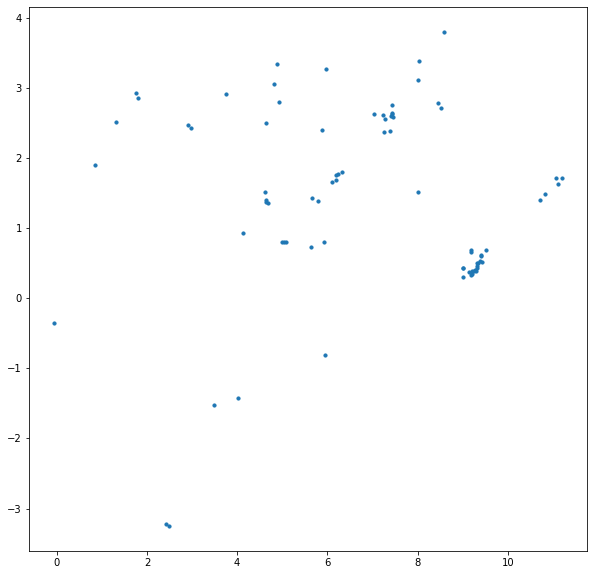

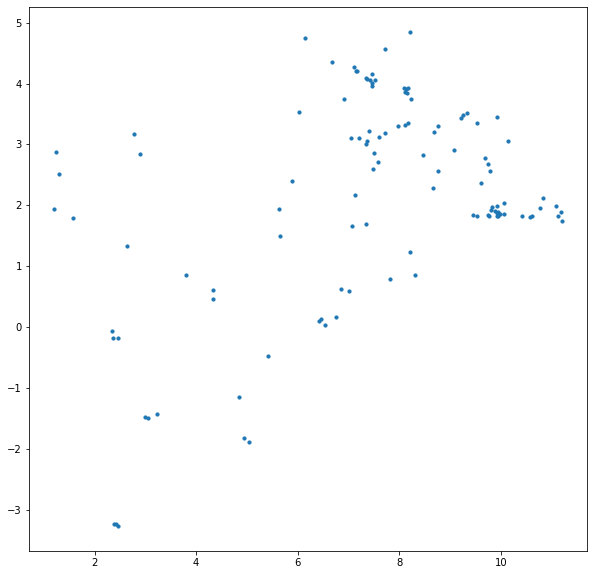

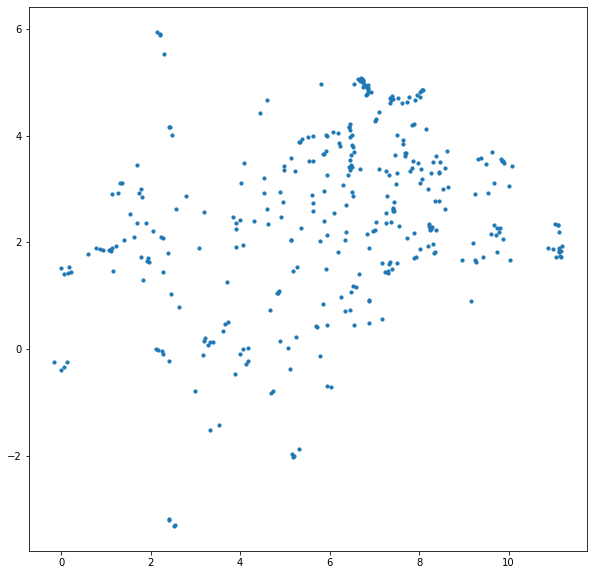

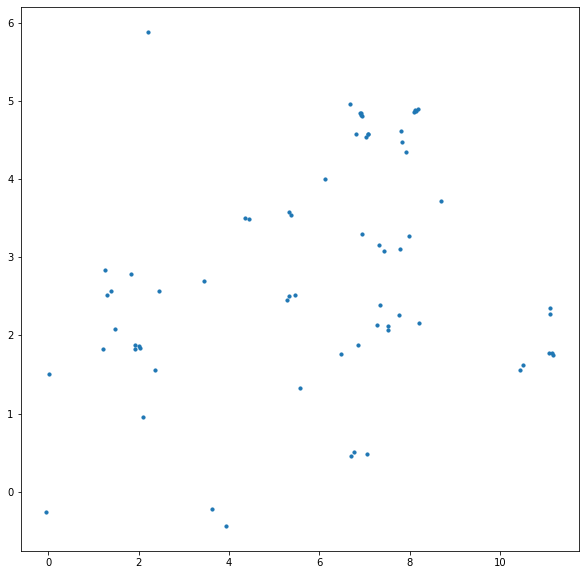

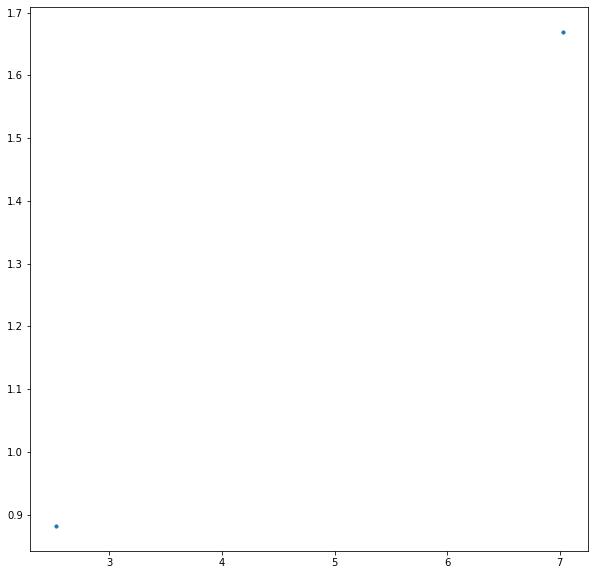

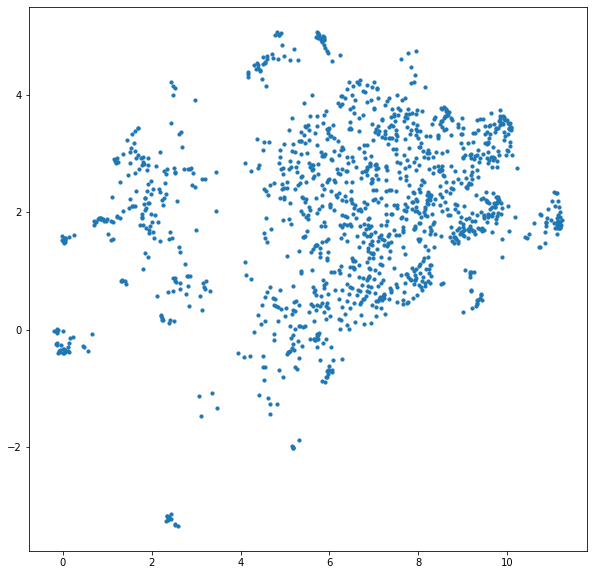

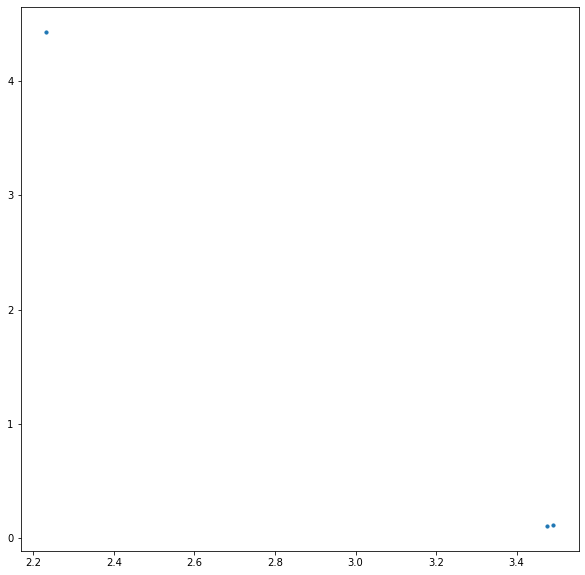

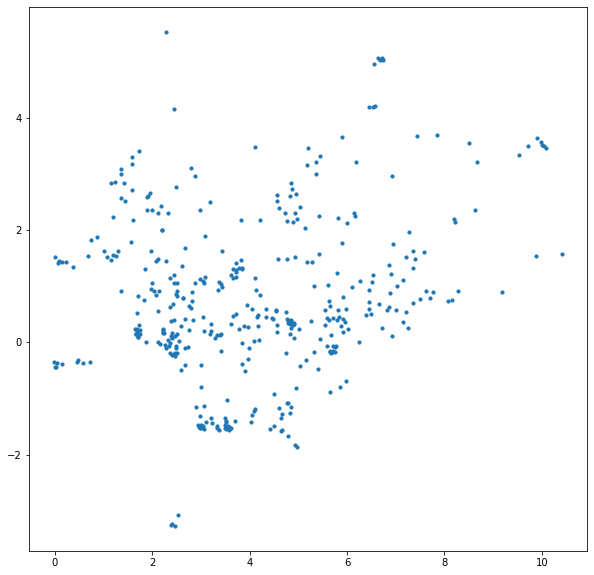

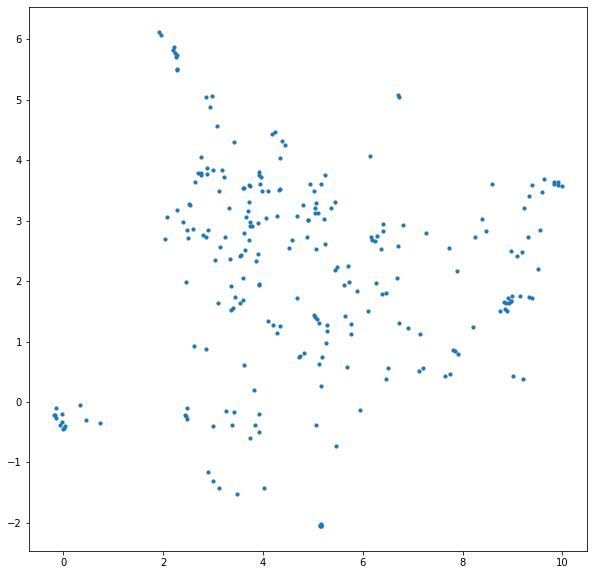

In [308]:
pro = protein_mat[np.stack(list(reps.values()))]
for i in range(28):
    plt.figure(figsize=(10,10))
    pro_indices = np.where(pro[:,i])[0]
    plt.scatter(embedding_representative[pro_indices, 0],
                embedding_representative[pro_indices, 1],
                   s=10)

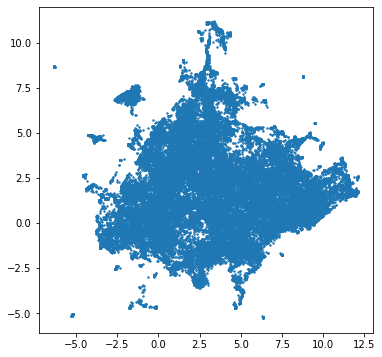

(-14.518075132369995,
 15.731172704696656,
 -16.047468614578246,
 16.639192056655883)

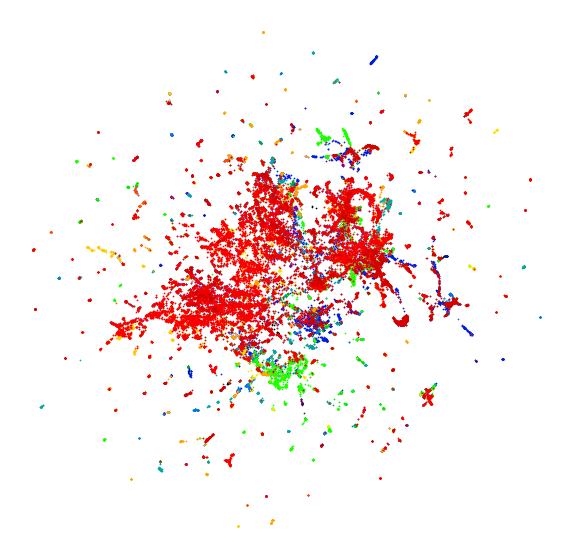

In [115]:
_, embedding_no_convergence = load_and_project('/scr/mdoron/Dino4Cells/models/without-norm-fixed-masked-mom-0.996-epoch-100_A549_reproduction_exact/exp06_features.pth')
a,b,c,d = torch.load('/scr/mdoron/Dino4Cells/models/without-norm-fixed-masked-mom-0.996-epoch-100_A549_reproduction_exact/other_model_features.pth')
protein_matrix = torch.stack(b)

plt.figure(figsize=(10,10))
for i in range(28):
    indices = np.where(protein_matrix[:,i])[0]
    plt.scatter(embedding[indices,0], embedding[indices,1], s=0.5,
               color=cmap(float(i / 28)),)
plt.axis('off')



(-14.518075132369995,
 15.731172704696656,
 -16.047468614578246,
 16.639192056655883)

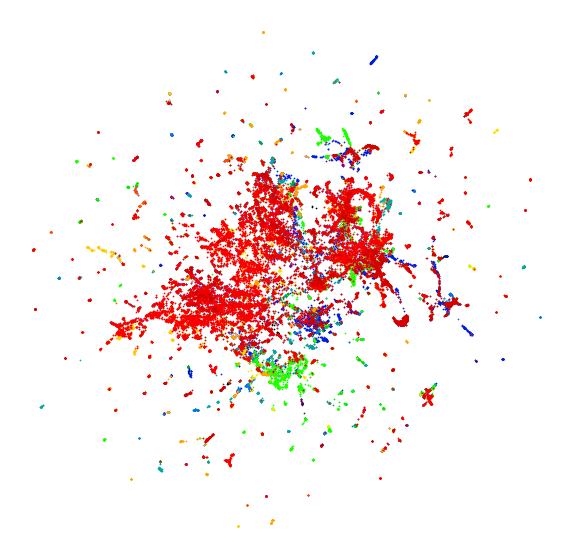

In [10]:
embedding = no_norm_embeddings_exp02
a,b,c,d = torch.load('/scr/mdoron/Dino4Cells/models/without-norm-fixed-masked-mom-0.996-epoch-100_A549_reproduction_exact/other_model_features.pth')
protein_matrix = torch.stack(b)

plt.figure(figsize=(10,10))
for i in range(28):
    indices = np.where(protein_matrix[:,i])[0]
    plt.scatter(embedding[indices,0], embedding[indices,1], s=0.5,
               color=cmap(float(i / 28)),)
plt.axis('off')



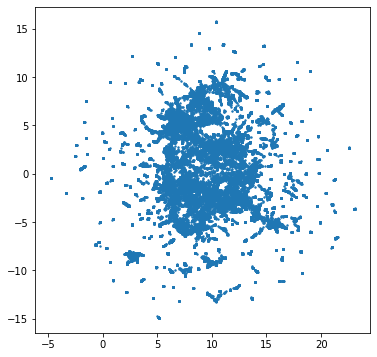

In [793]:
no_norm_features_exp02_on_local_data, no_norm_embeddings_exp02_on_local_data = load_and_project('/scr/mdoron/Dino4Cells/models/without-norm-fixed-masked-mom-0.996-epoch-100_A549_reproduction_exact/other_model_features.pth')


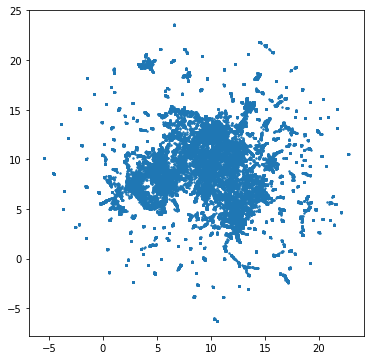

NameError: name 'cmap' is not defined

<Figure size 720x720 with 0 Axes>

In [5]:
no_norm_features_reproduction, no_norm_embeddings_reproduction = load_and_project('/scr/mdoron/Dino4Cells/models/without-norm-fixed-masked-mom-0.996-epoch-100_A549_reproduction_exact/other_model_features.pth')
embedding = no_norm_embeddings_reproduction
a,b,c,d = torch.load('/scr/mdoron/Dino4Cells/models/without-norm-fixed-masked-mom-0.996-epoch-100_A549_reproduction_exact/other_model_features.pth')
protein_matrix = torch.stack(b)

plt.figure(figsize=(10,10))
for i in range(28):
    indices = np.where(protein_matrix[:,i])[0]
    plt.scatter(embedding[indices,0], embedding[indices,1], s=0.5,
               color=cmap(float(i / 28)),)
plt.axis('off')



In [6]:
group_dict = pd.DataFrame(d, columns=['ID']).groupby('ID').groups

In [7]:
keys = sorted(list(group_dict.keys()))
plt.figure(figsize=(20,20), facecolor='white')
for i, key in enumerate(keys):
    indices = group_dict[key]
    plt.scatter(embedding[indices,0], embedding[indices,1], s=3,
               color=cmap(float(i / len(keys))),)
plt.axis('off')
plt.title('Colored by whole image ID', fontsize=30)

NameError: name 'cmap' is not defined

<Figure size 1440x1440 with 0 Axes>

In [13]:
group_dict = pd.DataFrame(d, columns=['ID']).groupby('ID').groups
keys = sorted(list(group_dict.keys()))
wells = [k.split('-')[1] if '-' in k else 'web' for k in keys]
df = pd.DataFrame(d, columns=['ID'])
df['well'] = df.ID.apply(lambda x: x.split('-')[1] if '-' in x else 'web')
group_dict_wells = df.groupby('well').groups


Text(0.5, 1.0, 'Colored by whole image ID')

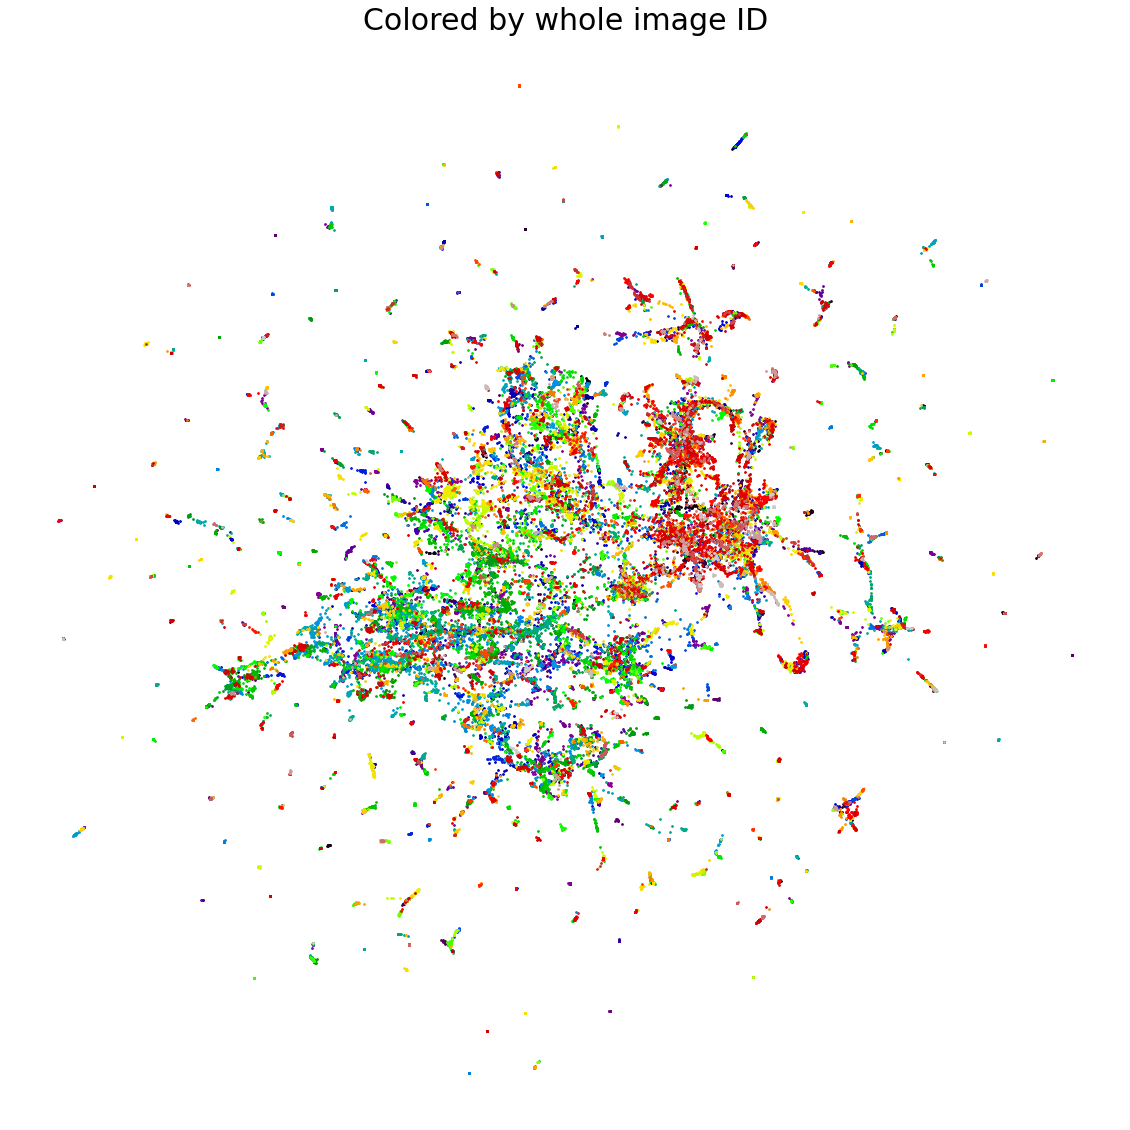

In [14]:
keys = sorted(list(group_dict.keys()))
plt.figure(figsize=(20,20), facecolor='white')
for i, key in enumerate(keys):
    indices = group_dict[key]
    plt.scatter(embedding[indices,0], embedding[indices,1], s=3,
               color=cmap(float(i / len(keys))),)
plt.axis('off')
plt.title('Colored by whole image ID', fontsize=30)

Text(0.5, 1.0, 'Colored by well ID')

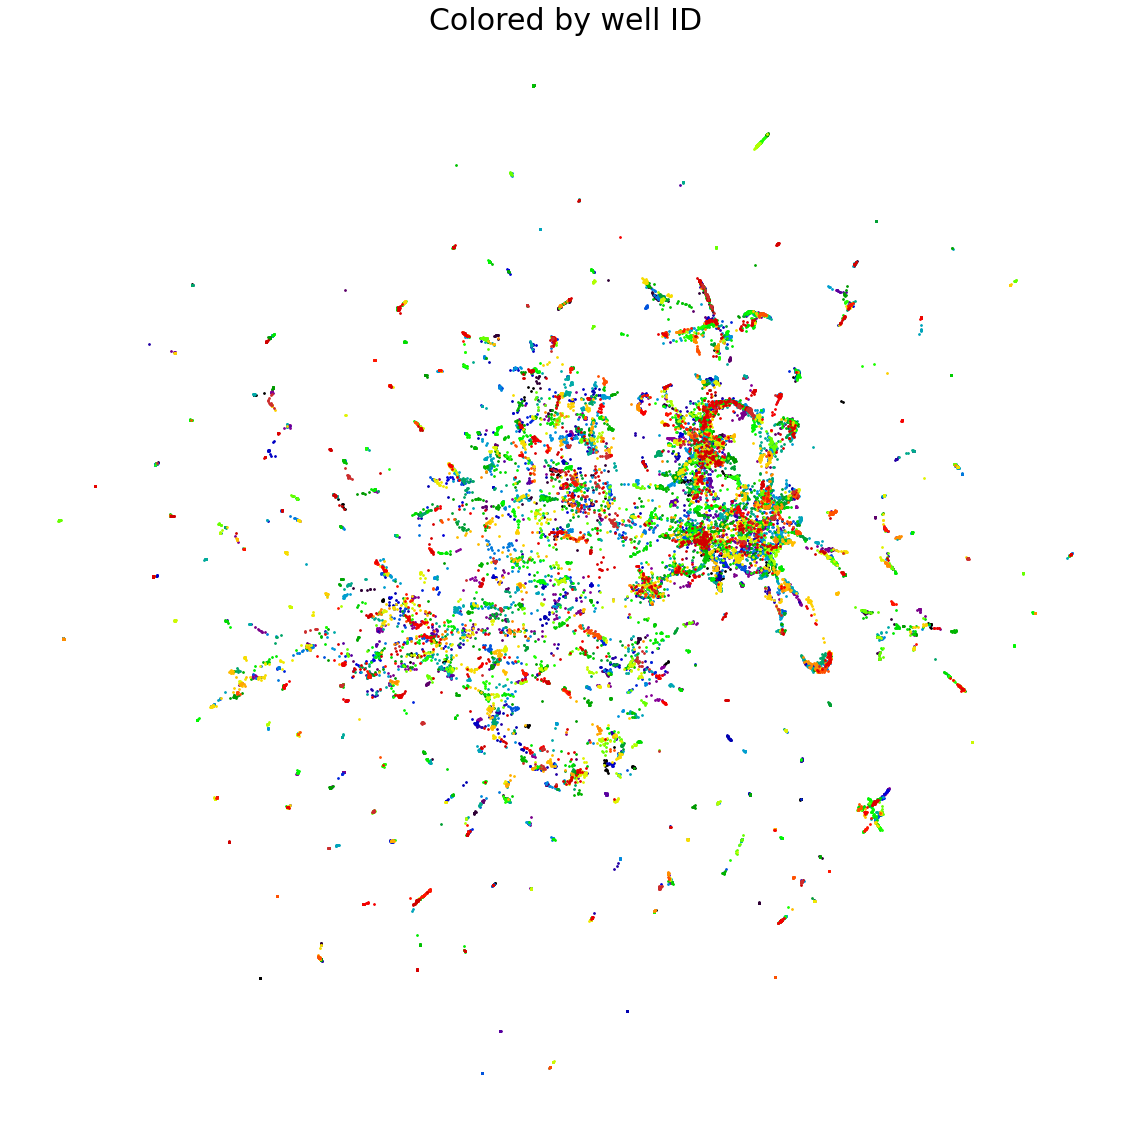

In [15]:
group_dict = pd.DataFrame(d, columns=['ID']).groupby('ID').groups
keys = sorted(list(group_dict.keys()))
wells = [k.split('-')[1] if '-' in k else 'web' for k in keys]
df = pd.DataFrame(d, columns=['ID'])
df['well'] = df.ID.apply(lambda x: x.split('-')[1] if '-' in x else 'web')
group_dict_wells = df.groupby('well').groups

keys = sorted(list(group_dict_wells.keys()))
plt.figure(figsize=(20,20), facecolor='white')
for i, key in enumerate(keys):
    if key == 'web': continue
    indices = group_dict_wells[key]
    plt.scatter(embedding[indices,0], embedding[indices,1], s=3,
               color=cmap(float(i / len(keys))),)
plt.axis('off')
plt.title('Colored by well ID', fontsize=30)

5


Text(0.5, 1.0, 'Colored by well ID')

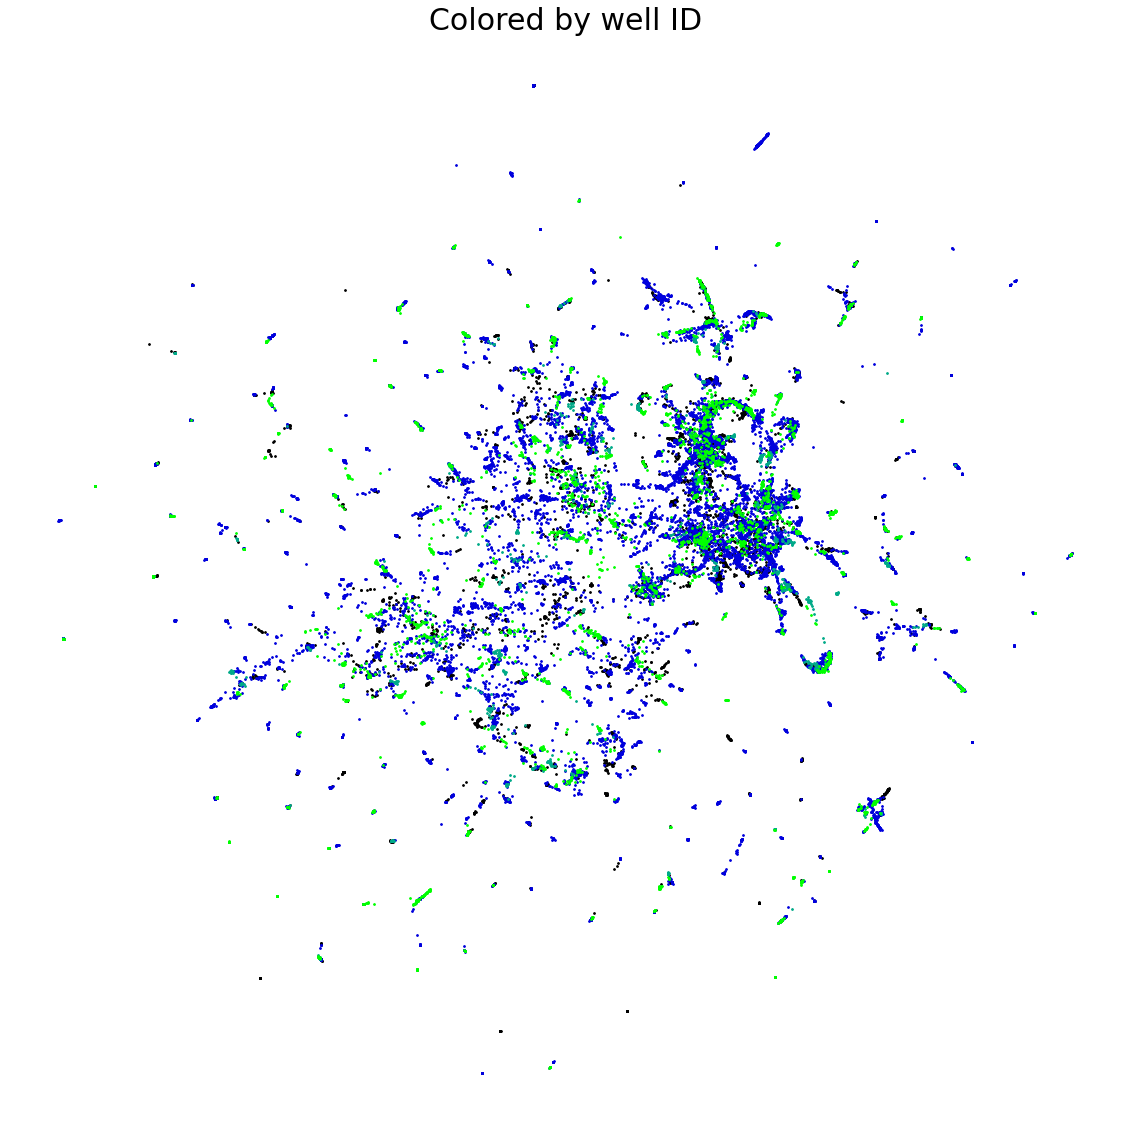

In [16]:
group_dict = pd.DataFrame(d, columns=['ID']).groupby('ID').groups
keys = sorted(list(group_dict.keys()))
df = pd.DataFrame(d, columns=['ID'])
df['well'] = df.ID.apply(lambda x: x.split('-')[3] if '-' in x else 'web')
group_dict_wells = df.groupby('well').groups
print(len(group_dict_wells))

keys = sorted(list(group_dict_wells.keys()))
plt.figure(figsize=(20,20), facecolor='white')
for i, key in enumerate(keys):
    if key == 'web': continue
    indices = group_dict_wells[key]
    plt.scatter(embedding[indices,0], embedding[indices,1], s=3,
               color=cmap(float(i / len(keys))),)
plt.axis('off')
plt.title('Colored by well ID', fontsize=30)

In [ ]:
keys = sorted(list(group_dict.keys()))
len(np.unique([k.split('-')[1] if '-' in k else 'web' for k in keys]))

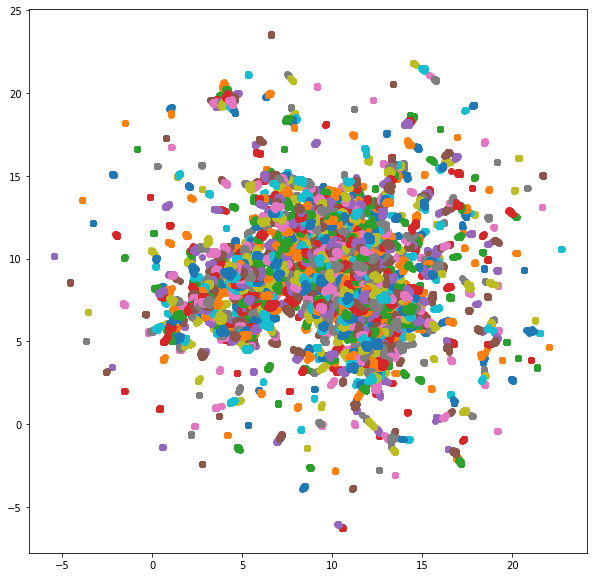

In [204]:
import pandas as pd
from scipy.spatial.distance import euclidean, pdist, squareform
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
indices = np.concatenate([group_dict[k] for k in list(group_dict.keys())[:500]])
p = pdist(embedding[indices,:])


In [113]:
# First, remove large cluster in the middle
from sklearn.cluster import DBSCAN
clustering = DBSCAN(eps=0.1, min_samples=2).fit(embedding_all)
cluster_sizes = {c : len(np.where(clustering.labels_ == c)[0]) for c in np.unique(clustering.labels_)}
# clusters = fcluster(Z, 500, criterion='distance')
clusters = clustering.labels_


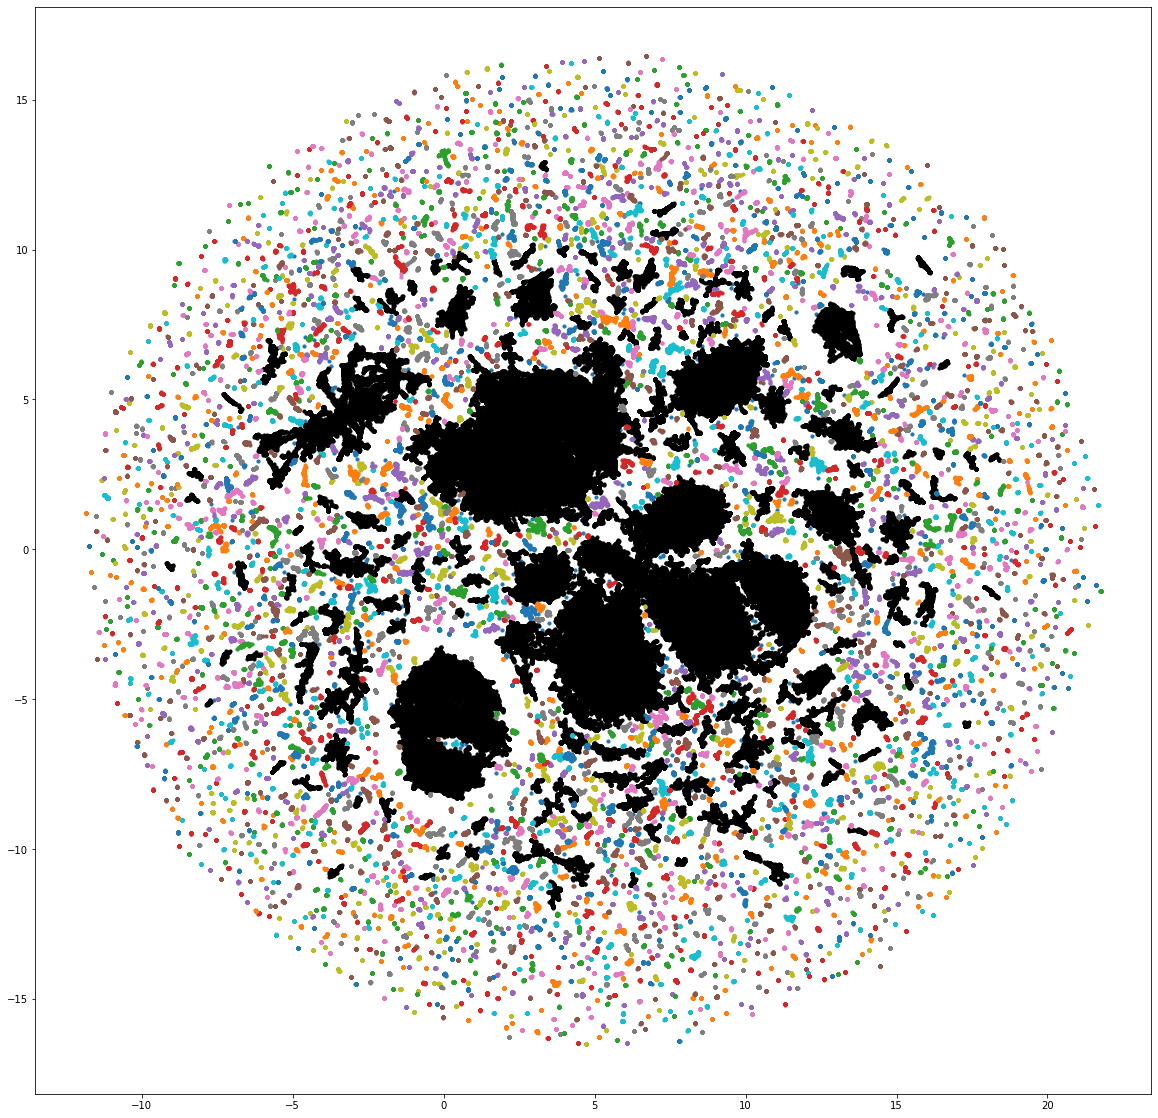

In [114]:

plt.figure(figsize=(20,20))
for c in np.unique(clusters):
    c_indices = np.where(clusters == c)
    if cluster_sizes[c] > 300: 
        plt.scatter(embedding_all[c_indices,0],
                   embedding_all[c_indices,1],
                   s=10, color='black')
    else:
        plt.scatter(embedding_all[c_indices,0],
                   embedding_all[c_indices,1],
                   s=10)
        
        

In [118]:
center_cluster_indices = []
isolated_cluster_indices = []

for c in np.unique(clusters):
    c_indices = np.where(clusters == c)[0]
    if cluster_sizes[c] > 500: 
        center_cluster_indices.extend(c_indices)
    else:
        isolated_cluster_indices.extend(c_indices)


In [123]:
len(sorted(protein_to_num_single_cells.keys()))

19

([<matplotlib.axis.XTick at 0x7fc4406fd1f0>,
 [Text(0, 0, 'actin filaments,focal adhesion sites'),
  Text(1, 0, 'aggresome'),
  Text(2, 0, 'centrosome,centriolar satellite'),
  Text(3, 0, 'cytosol'),
  Text(4, 0, 'endoplasmic reticulum'),
  Text(5, 0, 'golgi apparatus'),
  Text(6, 0, 'intermediate filaments'),
  Text(7, 0, 'microtubules'),
  Text(8, 0, 'mitochondria'),
  Text(9, 0, 'mitotic spindle'),
  Text(10, 0, 'no staining'),
  Text(11, 0, 'nuclear bodies'),
  Text(12, 0, 'nuclear membrane'),
  Text(13, 0, 'nuclear speckles'),
  Text(14, 0, 'nucleoli'),
  Text(15, 0, 'nucleoli fibrillar center'),
  Text(16, 0, 'nucleoplasm'),
  Text(17, 0, 'plasma membrane,cell junctions'),
  Text(18, 0, 'vesicles,peroxisomes,endosomes,lysosomes,lipid droplets,cytoplasmic bodies')])

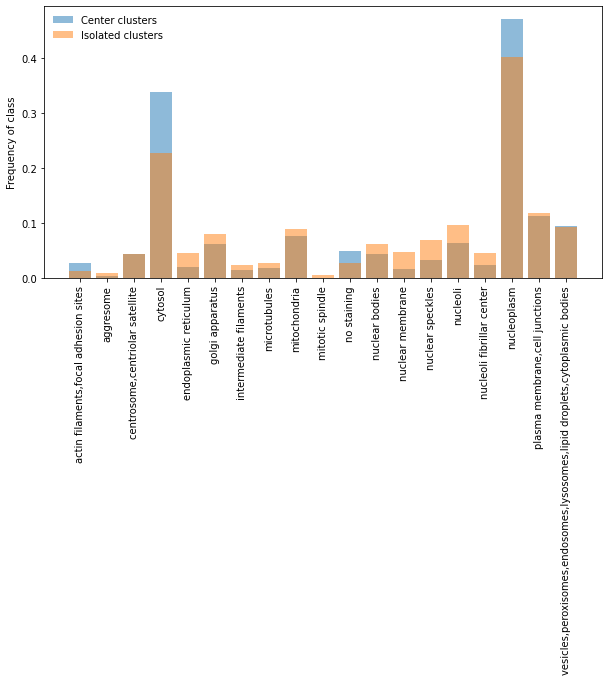

In [125]:
from label_dict import protein_to_num_full, protein_to_num_single_cells
plt.figure(figsize=(10,5))
plt.bar(range(19), protein_matrix[center_cluster_indices].float().mean(axis=0), alpha=0.5, label='Center clusters')
plt.bar(range(19), protein_matrix[isolated_cluster_indices].float().mean(axis=0), alpha=0.5, label='Isolated clusters')
plt.legend(frameon=False)
plt.ylabel('Frequency of class')
plt.xticks(range(19), sorted(protein_to_num_single_cells.keys()), rotation=90)




In [17]:
indices = np.where(clusters == c)[0]
unique_wells = {c : len(df.iloc[np.where(clusters == c)[0]].well.unique()) for c in np.unique(clusters) if cluster_sizes[c] < 150}
unique_whole_images = {c : len(df.iloc[np.where(clusters == c)[0]].ID.unique()) for c in np.unique(clusters) if cluster_sizes[c] < 150}


In [118]:
import pandas as pd
from scipy.spatial.distance import euclidean, pdist, squareform
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
indices = np.where(clusters == 0)[0]
p = pdist(embedding[indices,:])
p_no_convergence = pdist(embedding_no_convergence[indices,:])


In [119]:
dists = squareform(p)
dists_no_convergence = squareform(p_no_convergence)


In [120]:
big_cluster_dists = dists
big_cluster_indices = np.where(clusters == 0)[0]
exp06_dists = dists_no_convergence
exp06_indices = np.where(clusters == 0)[0]


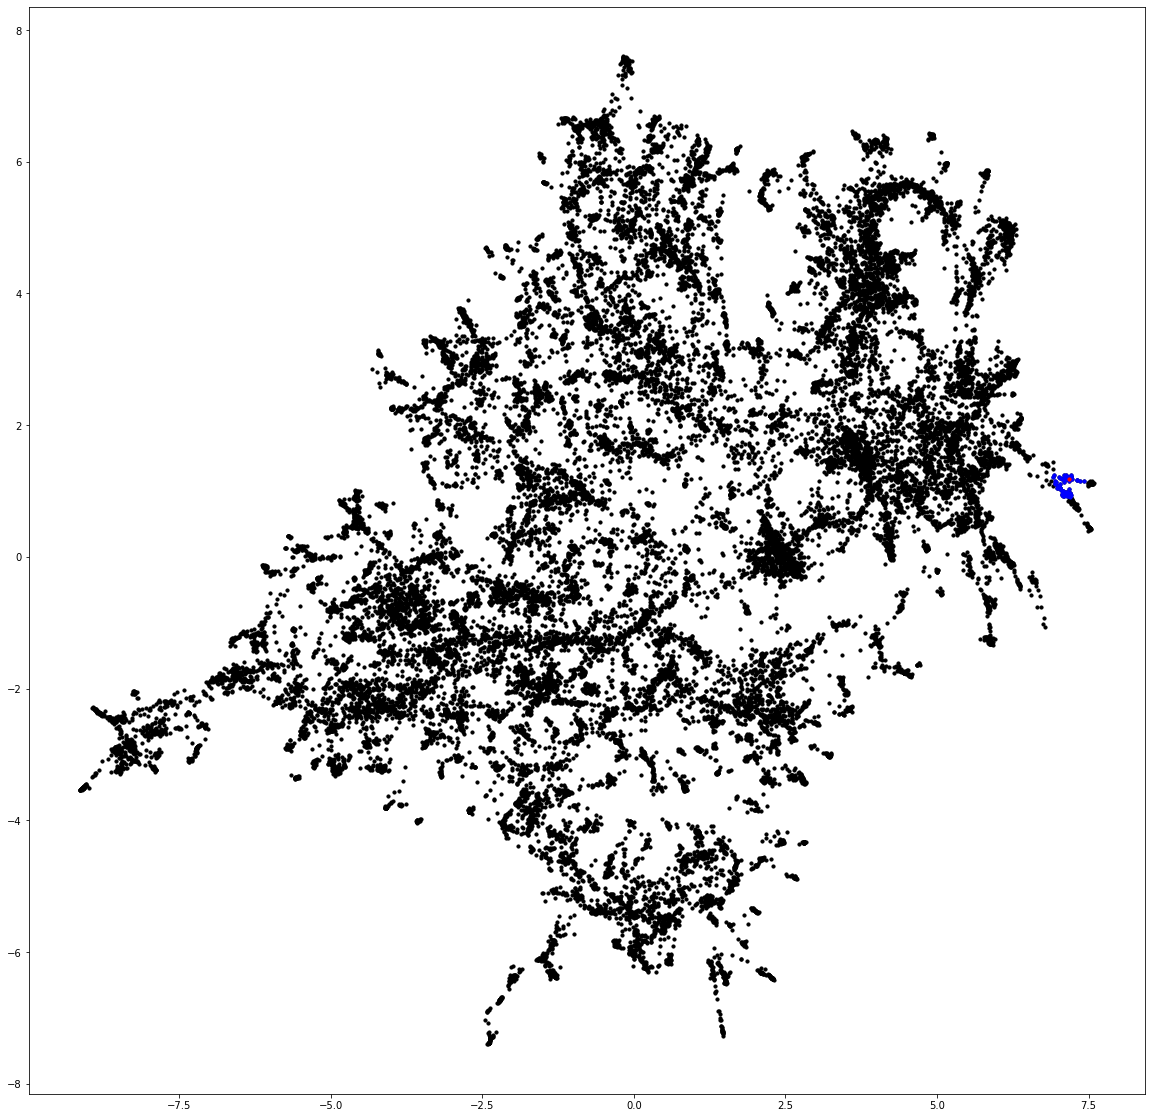

In [123]:
random_ind = np.random.choice(range(len(big_cluster_dists)))
closest_neighbors = np.argsort(big_cluster_dists[random_ind, :])[1:101]
random_cluster_indices = big_cluster_indices[closest_neighbors]

plt.figure(figsize=(20,20))
c_indices = np.where(clusters == 0)[0]
plt.scatter(embedding[c_indices,0],
            embedding[c_indices,1],
           s=10, color='black')

plt.scatter(embedding[random_cluster_indices, 0], 
            embedding[random_cluster_indices, 1], color='blue', s=10)

plt.scatter(embedding[big_cluster_indices[random_ind], 0], 
            embedding[big_cluster_indices[random_ind], 1], color='red', s=10)



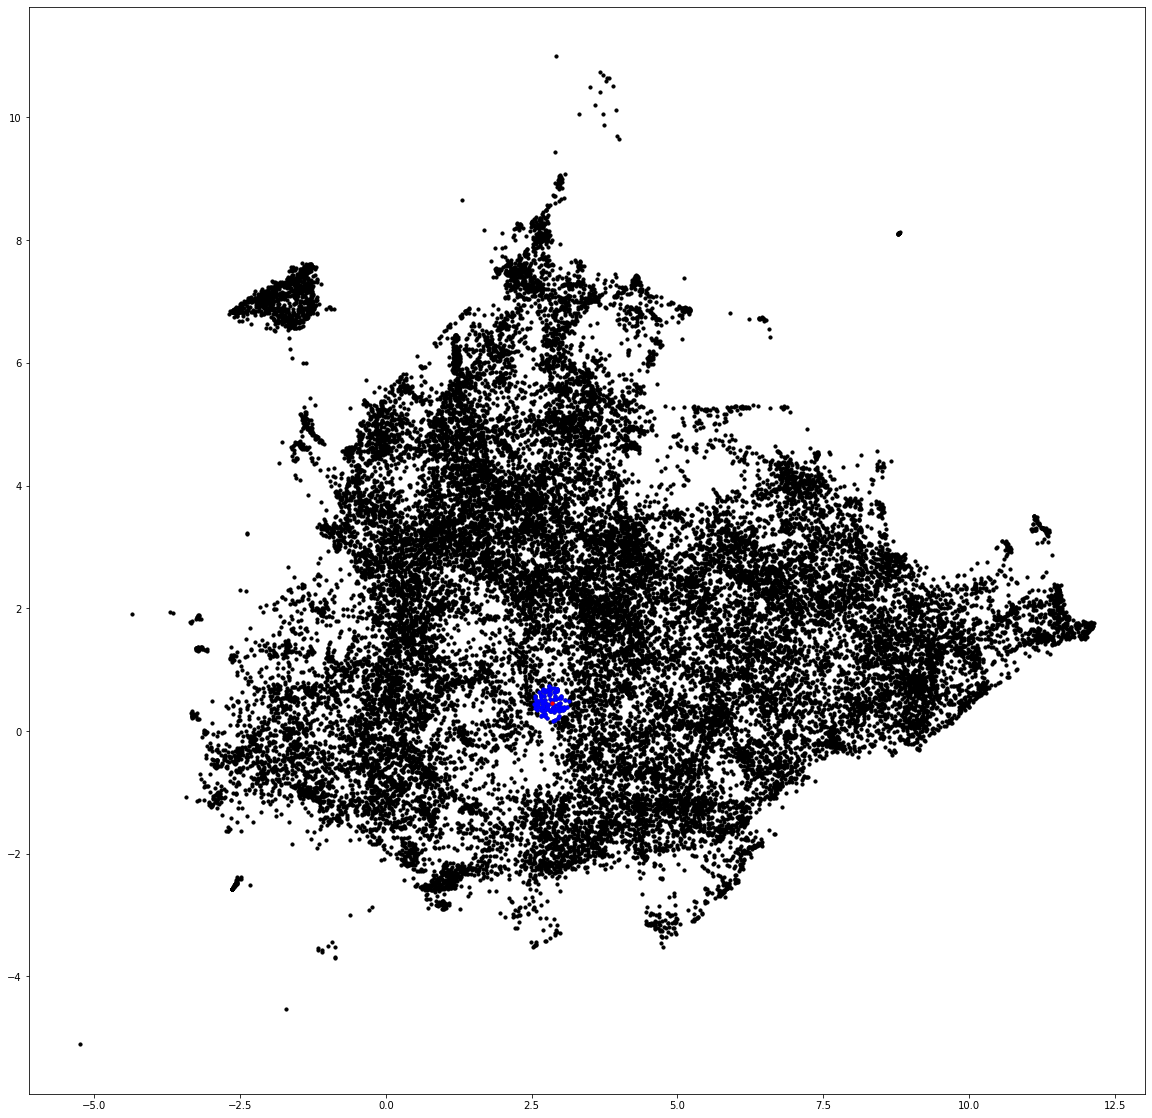

In [125]:
random_ind = np.random.choice(range(len(exp06_dists)))
closest_neighbors = np.argsort(exp06_dists[random_ind, :])[1:101]
random_cluster_indices = exp06_indices[closest_neighbors]

plt.figure(figsize=(20,20))
c_indices = np.where(clusters == 0)[0]
plt.scatter(embedding_no_convergence[c_indices,0],
            embedding_no_convergence[c_indices,1],
           s=10, color='black')

plt.scatter(embedding_no_convergence[random_cluster_indices, 0], 
            embedding_no_convergence[random_cluster_indices, 1], color='blue', s=10)

plt.scatter(embedding_no_convergence[exp06_indices[random_ind], 0], 
            embedding_no_convergence[exp06_indices[random_ind], 1], color='red', s=10)



In [58]:
closest_neighbors

array([0.00377618, 0.01412531, 0.02625288, 0.02703364, 0.02708891])

In [126]:
b_str = np.array([str(list(bb.numpy())) for bb in b])
big_cluster_indices = np.where(clusters == 0)[0]
unique_whole_images = {}
unique_wells = {}
unique_proteins = {}
random_unique_whole_images = {}
random_unique_wells = {}
random_unique_proteins = {}
exp06_unique_whole_images = {}
exp06_unique_wells = {}
exp06_unique_proteins = {}

for c in np.unique(clusters):
    if cluster_sizes[c] >= 150: continue
    random_ind = np.random.choice(range(len(big_cluster_dists)))
    closest_neighbors = np.argsort(big_cluster_dists[random_ind, :])[1:len(np.where(clusters == c)[0]) + 1]
    random_cluster_indices = big_cluster_indices[closest_neighbors]

    exp06_ind = np.random.choice(range(len(exp06_dists)))
    exp06_closest_neighbors = np.argsort(exp06_dists[random_ind, :])[1:len(np.where(clusters == c)[0]) + 1]
    exp06_cluster_indices = exp06_indices[exp06_closest_neighbors]

    unique_whole_images[c] = len(df.iloc[np.where(clusters == c)[0]].ID.unique())
    random_unique_whole_images[c] = len(df.iloc[random_cluster_indices].ID.unique())
    exp06_unique_whole_images[c] = len(df.iloc[exp06_cluster_indices].ID.unique())
    unique_wells[c] = len(df.iloc[np.where(clusters == c)[0]].well.unique())
    random_unique_wells[c] = len(df.iloc[random_cluster_indices].well.unique())
    exp06_unique_wells[c] = len(df.iloc[exp06_cluster_indices].well.unique())
    unique_proteins[c] = len(np.unique(b_str[np.where(clusters == c)[0]]))
    random_unique_proteins[c] = len(np.unique(b_str[random_cluster_indices]))
    exp06_unique_proteins[c] = len(np.unique(b_str[exp06_cluster_indices]))


average wells in small clusters: 2.0638297872340425
average wells in big cluster: 3.1382978723404253
average wells in exp06: 3.8138297872340425
average images in small clusters: 4.50531914893617
average images in big cluster: 13.888297872340425
average images in exp06: 24.840425531914892


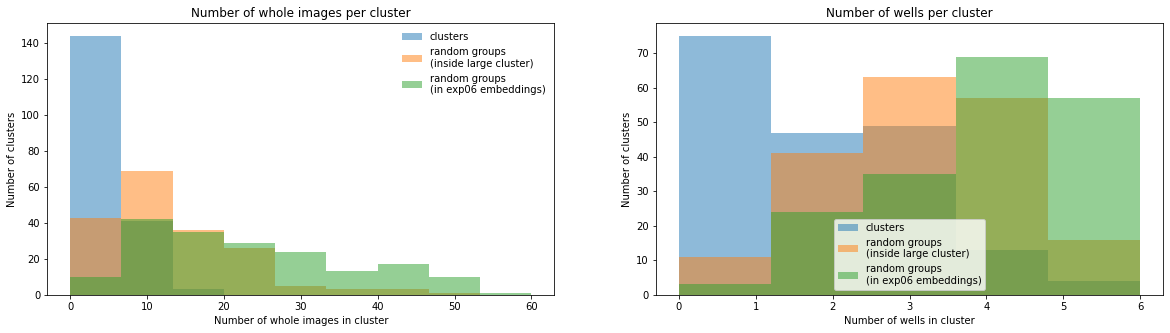

In [133]:
fig, axes = plt.subplots(1,2, figsize=(20,5))
axes[0].hist(unique_whole_images.values(), bins=np.linspace(0,60,10), alpha=0.5, label='clusters')
axes[0].hist(random_unique_whole_images.values(), bins=np.linspace(0,60,10), alpha=0.5, label='random groups\n(inside large cluster)')
axes[0].hist(exp06_unique_whole_images.values(), bins=np.linspace(0,60,10), alpha=0.5, label='random groups\n(in exp06 embeddings)')
axes[0].set_title('Number of whole images per cluster')
np.median(list(unique_whole_images.values()))
axes[0].set_xlabel('Number of whole images in cluster')
axes[0].set_ylabel('Number of clusters')
axes[0].legend(frameon=False)

axes[1].hist(unique_wells.values(), bins=np.linspace(0,6,6), alpha=0.5, label='clusters')
axes[1].hist(random_unique_wells.values(), bins=np.linspace(0,6,6), alpha=0.5, label='random groups\n(inside large cluster)')
axes[1].hist(exp06_unique_wells.values(), bins=np.linspace(0,6,6), alpha=0.5, label='random groups\n(in exp06 embeddings)')
axes[1].set_title('Number of wells per cluster')
axes[1].set_xlabel('Number of wells in cluster')
axes[1].set_ylabel('Number of clusters')
print(f'average wells in small clusters: {np.mean(list(unique_wells.values()))}')
print(f'average wells in big cluster: {np.mean(list(random_unique_wells.values()))}')
print(f'average wells in exp06: {np.mean(list(exp06_unique_wells.values()))}')
print(f'average images in small clusters: {np.mean(list(unique_whole_images.values()))}')
print(f'average images in big cluster: {np.mean(list(random_unique_whole_images.values()))}')
print(f'average images in exp06: {np.mean(list(exp06_unique_whole_images.values()))}')

axes[1].legend(loc='lower center')


average unique protein localization in small clusters: 2.0904255319148937
average unique protein localization in big cluster: 6.148936170212766
average unique protein localization in exp06: 9.686170212765957


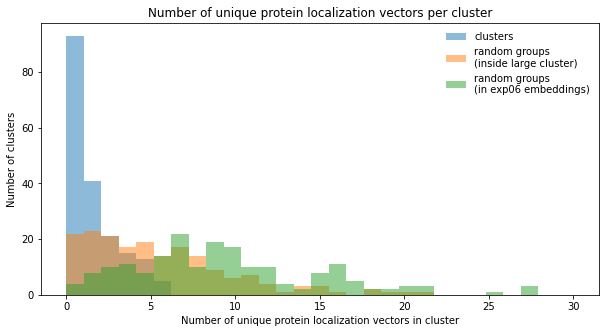

In [136]:
fig, axes = plt.subplots(1,1, figsize=(10,5))
axes.hist(unique_proteins.values(), bins=np.linspace(0,30,30), alpha=0.5, label='clusters')
axes.hist(random_unique_proteins.values(), bins=np.linspace(0,30,30), alpha=0.5, label='random groups\n(inside large cluster)')
axes.hist(exp06_unique_proteins.values(), bins=np.linspace(0,30,30), alpha=0.5, label='random groups\n(in exp06 embeddings)')
axes.set_title('Number of unique protein localization vectors per cluster')
np.median(list(unique_whole_images.values()))
axes.set_xlabel('Number of unique protein localization vectors in cluster')
axes.set_ylabel('Number of clusters')
axes.legend(frameon=False)
np.mean(list(unique_proteins.values()))
print(f'average unique protein localization in small clusters: {np.mean(list(unique_proteins.values()))}')
print(f'average unique protein localization in big cluster: {np.mean(list(random_unique_proteins.values()))}')
print(f'average unique protein localization in exp06: {np.mean(list(exp06_unique_proteins.values()))}')


Text(0, 0.5, 'Number of whole images')

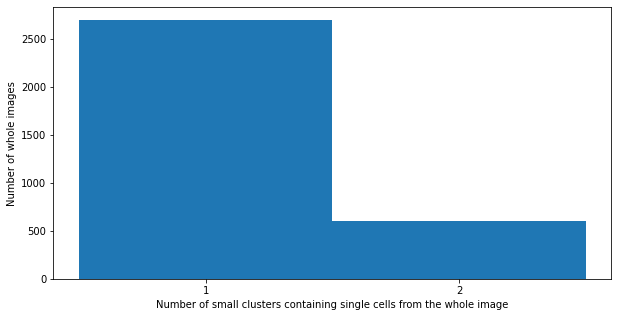

In [389]:
unique_clusters = {}
for k in group_dict.keys():
    v = group_dict[k]
    unique_clusters_per_image = np.unique(clusters[v])
    n = len([f for f in unique_clusters_per_image])
#     n = len([f for f in unique_clusters_per_image if cluster_sizes[f] < 150])
    if n > 0:
        unique_clusters[k] = n
fig, axes = plt.subplots(1,1, figsize=(10,5))
axes.hist(unique_clusters.values(), bins=[1,2,3])
axes.set_xticks([1.5,2.5])
axes.set_xticklabels([1,2])
axes.set_xlabel('Number of small clusters containing single cells from the whole image')
axes.set_ylabel('Number of whole images')


1.7040816326530612

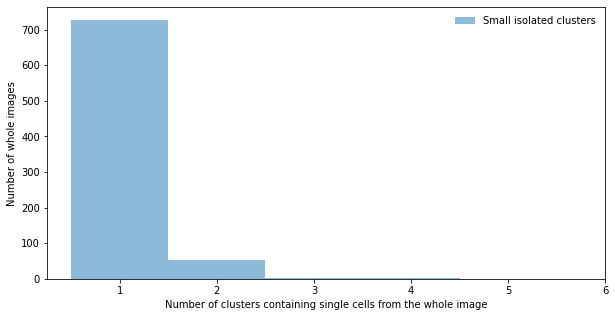

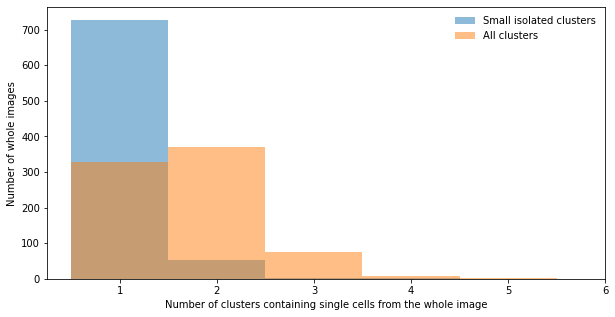

In [142]:
unique_clusters = {}
for k in group_dict.keys():
    v = group_dict[k]
    unique_clusters_per_image = np.unique(clusters[v])
    n = len([f for f in unique_clusters_per_image if cluster_sizes[f] < 150])
    if n > 0:
        unique_clusters[k] = n

all_unique_clusters = {}
for k in unique_clusters.keys():
    v = group_dict[k]
    unique_clusters_per_image = np.unique(clusters[v])
    n = len([f for f in unique_clusters_per_image])
    if n > 0:
        all_unique_clusters[k] = n


fig, axes = plt.subplots(1,1, figsize=(10,5))
axes.hist(unique_clusters.values(), bins=[1,2,3,4,5,6], alpha=0.5, label='Small isolated clusters')
axes.set_xticks([1.5,2.5,3.5,4.5,5.5,6.5])
axes.set_xticklabels([1,2,3,4,5,6])
axes.set_xlabel('Number of clusters containing single cells from the whole image')
axes.set_ylabel('Number of whole images')
plt.legend(frameon=False)
np.mean(list(all_unique_clusters.values()))
        
        
fig, axes = plt.subplots(1,1, figsize=(10,5))
axes.hist(unique_clusters.values(), bins=[1,2,3,4,5,6], alpha=0.5, label='Small isolated clusters')
axes.hist(all_unique_clusters.values(), bins=[1,2,3,4,5,6], alpha=0.5, label='All clusters')
axes.set_xticks([1.5,2.5,3.5,4.5,5.5,6.5])
axes.set_xticklabels([1,2,3,4,5,6])
axes.set_xlabel('Number of clusters containing single cells from the whole image')
axes.set_ylabel('Number of whole images')
plt.legend(frameon=False)
np.mean(list(all_unique_clusters.values()))


In [128]:
# looking at clusters with 1 whole image
# looking at clusters with 2 whole images
# looking at clusters with 2 protein localizations
# looking at clusters that contain all single cells from whole image
# looking at clusters whose whole images are contained fully in cluster
df = pd.read_csv('/scr/mdoron/Dino4Cells/data/fixed_size_masked_single_cells_A549.csv')

In [ ]:
pd.DataFrame(i1)[0].isin(f1)

unique whole images: 8
unique wells: 3
unique protein localizations: 5


/tmp/ipykernel_3790961/2041271237.py:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


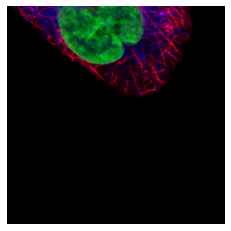

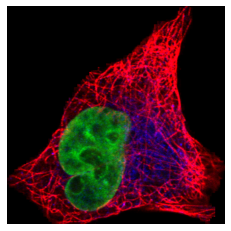

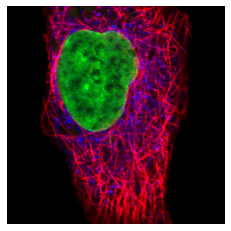

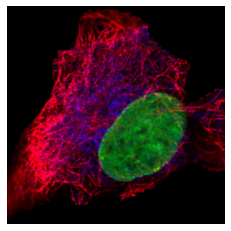

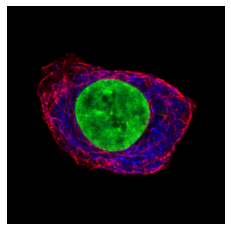

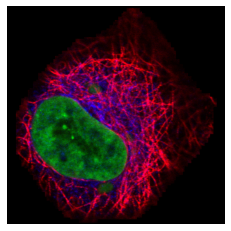

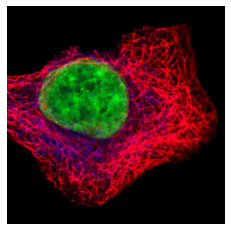

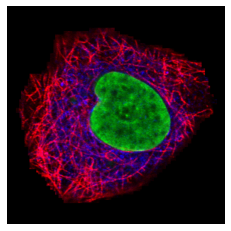

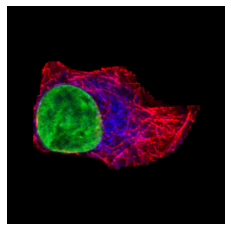

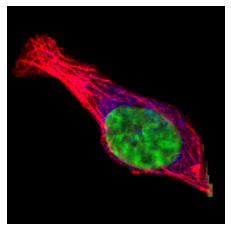

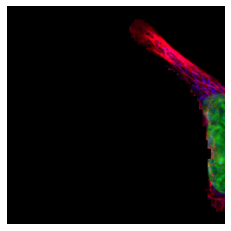

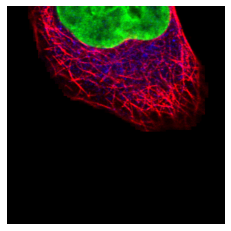

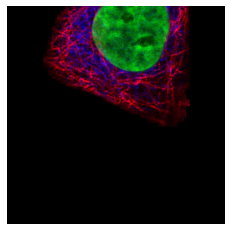

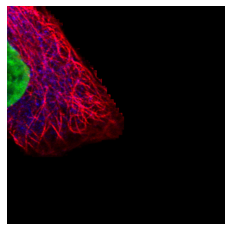

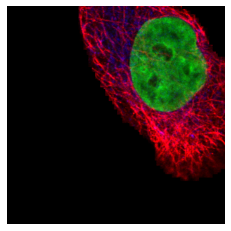

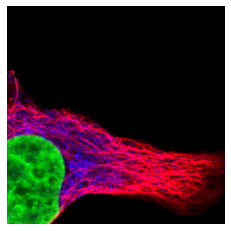

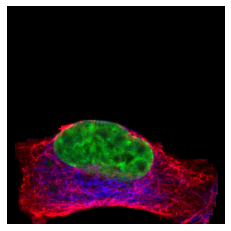

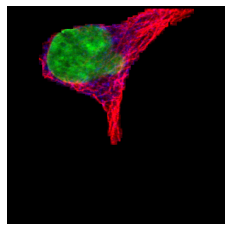

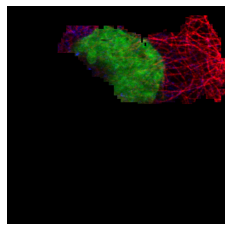

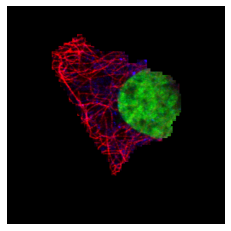

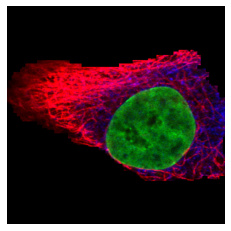

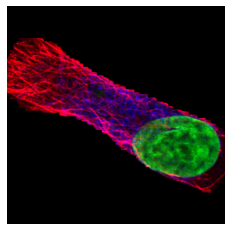

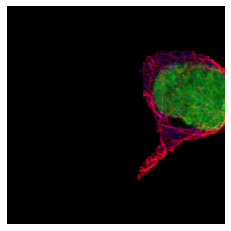

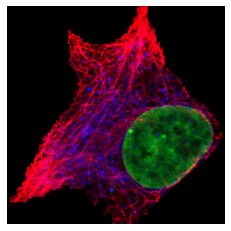

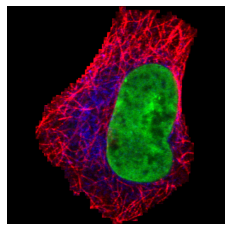

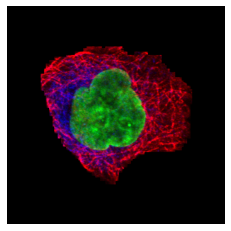

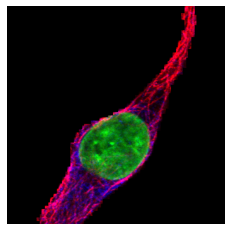

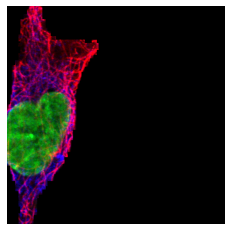

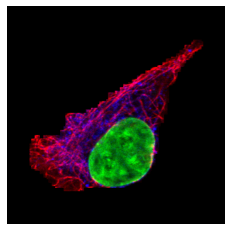

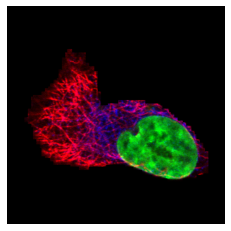

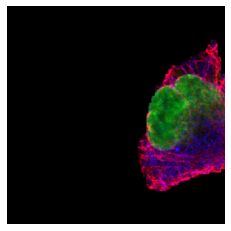

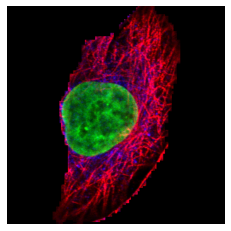

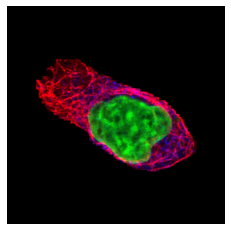

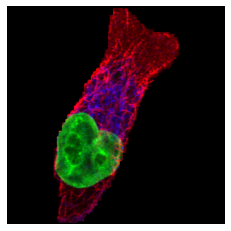

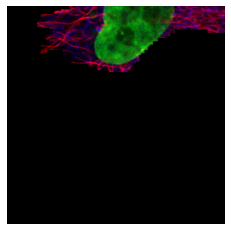

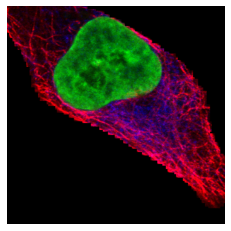

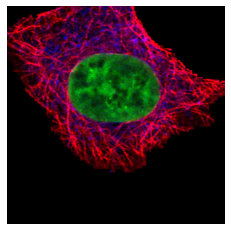

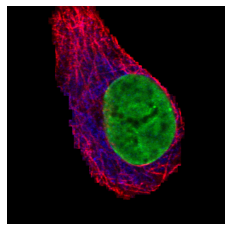

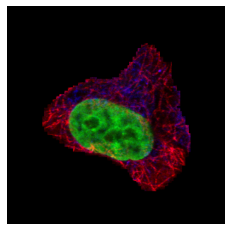

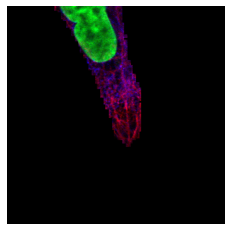

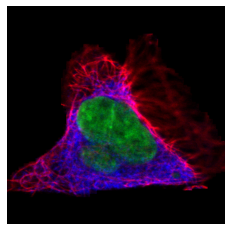

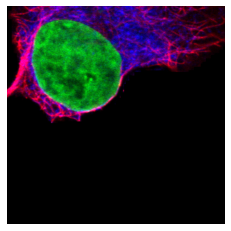

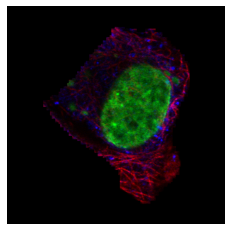

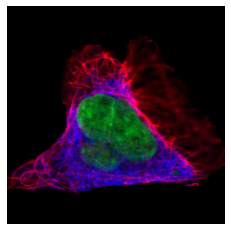

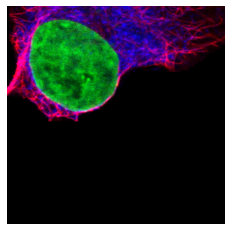

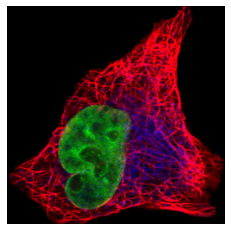

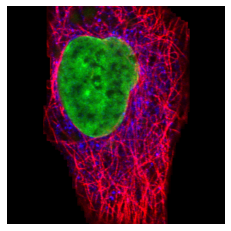

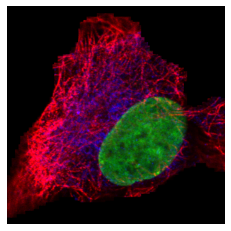

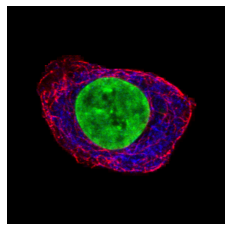

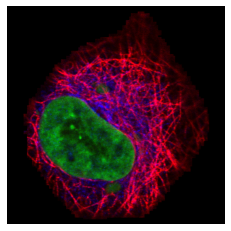

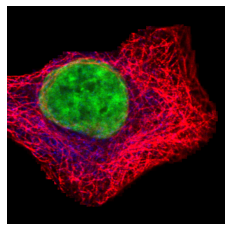

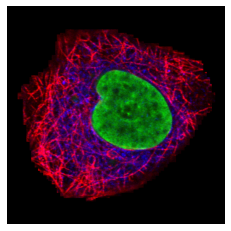

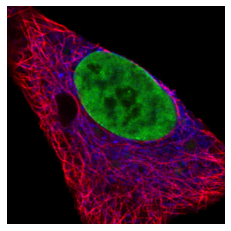

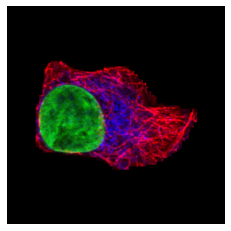

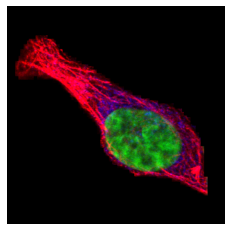

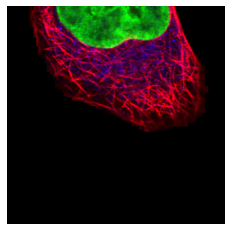

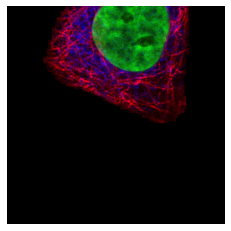

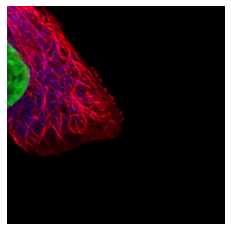

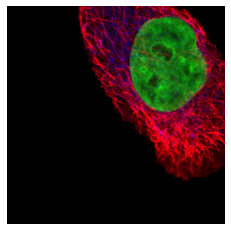

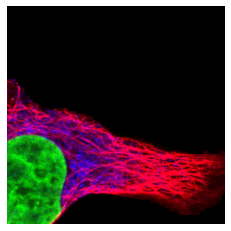

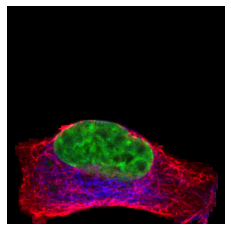

In [424]:
cluster = 11
print(f'unique whole images: {unique_whole_images[cluster]}')
print(f'unique wells: {unique_wells[cluster]}')
print(f'unique protein localizations: {unique_proteins[cluster]}')
inds = np.where(clusters == cluster)[0]
for f in df.iloc[inds].file:
    plt.figure()
    img = io.imread(f)
    plt.imshow(img[:,:,[0,2,3]])
    plt.axis('off')


In [437]:
img = io.imread(f"/scr/mdoron/Dino4Cells/data/large_whole_images/{f.split('/')[-1].split('_')[0]}.png")
nan_img = np.where(img == 0, np.nan, img)
non_zero_means = np.nanmean(nan_img, axis=(0,1))
zero_means = np.nanmean(img, axis=(0,1))


In [139]:
from tqdm import tqdm

whole_images = np.unique(d)
def get_means(dd):    
    img = io.imread(f"/scr/mdoron/Dino4Cells/data/large_whole_images/{dd}.png")
    nan_img = np.where(img == 0, np.nan, img)
    return np.mean(img, axis=(0,1)), np.nanmean(nan_img, axis=(0,1)), [np.isnan(nan_img[:,:,c]).mean() for c in range(4)]

from multiprocessing import Pool
pool = Pool(20)
results = list(tqdm(pool.imap(get_means, whole_images), total=len(whole_images)))
results = np.stack(results)

  0%|                                                                                                                                                                                                                                          | 0/3309 [00:00<?, ?it/s]


NameError: name 'io' is not defined

In [699]:
# TODO:
# remove from dist the rows of whole images from the same cluster

In [716]:
from tqdm import tqdm

single_cell_files = np.array(list(df.file.values))
def get_means(dd):    
    img = io.imread(dd)
    nan_img = np.where(img == 0, np.nan, img)
    return np.mean(img, axis=(0,1)), np.nanmean(nan_img, axis=(0,1)), np.array([np.isnan(nan_img[:,:,c]).mean() for c in range(4)])

from multiprocessing import Pool
pool = Pool(20)
single_cell_results = list(tqdm(pool.imap(get_means, single_cell_files), total=len(single_cell_files)))
single_cell_results = np.stack(single_cell_results)

 49%|███████████████████████████████████████████████████████████████████████████████                                                                                 | 22297/45138 [00:46<00:44, 518.25it/s]/tmp/ipykernel_3790961/3113620702.py:7: RuntimeWarning: Mean of empty slice
  return np.mean(img, axis=(0,1)), np.nanmean(nan_img, axis=(0,1)), np.array([np.isnan(nan_img[:,:,c]).mean() for c in range(4)])
 51%|█████████████████████████████████████████████████████████████████████████████████▋                                                                              | 23029/45138 [00:47<00:40, 545.22it/s]/tmp/ipykernel_3790961/3113620702.py:7: RuntimeWarning: Mean of empty slice
  return np.mean(img, axis=(0,1)), np.nanmean(nan_img, axis=(0,1)), np.array([np.isnan(nan_img[:,:,c]).mean() for c in range(4)])
 52%|██████████████████████████████████████████████████████████████████████████████████▌                                                                             | 23302/45138 [

Process ForkPoolWorker-564:
Process ForkPoolWorker-565:
Process ForkPoolWorker-561:
Process ForkPoolWorker-573:
Process ForkPoolWorker-571:
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/scr/mdoron/miniconda3/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
Traceback (most recent call last):
Traceback (most recent call last):
  File "/scr/mdoron/miniconda3/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/scr/mdoron/miniconda3/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/scr/mdoron/miniconda3/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
Traceback (most recent call last):
Traceback (most recent 

  File "/scr/mdoron/miniconda3/lib/python3.9/multiprocessing/queues.py", line 365, in get
    with self._rlock:
  File "/scr/mdoron/miniconda3/lib/python3.9/multiprocessing/queues.py", line 365, in get
    with self._rlock:
  File "/scr/mdoron/miniconda3/lib/python3.9/multiprocessing/synchronize.py", line 95, in __enter__
    return self._semlock.__enter__()
  File "/scr/mdoron/miniconda3/lib/python3.9/multiprocessing/queues.py", line 366, in get
    res = self._reader.recv_bytes()
  File "/scr/mdoron/miniconda3/lib/python3.9/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/scr/mdoron/miniconda3/lib/python3.9/multiprocessing/queues.py", line 365, in get
    with self._rlock:
  File "/scr/mdoron/miniconda3/lib/python3.9/multiprocessing/synchronize.py", line 95, in __enter__
    return self._semlock.__enter__()
  File "/scr/mdoron/miniconda3/lib/python3.9/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/scr/mdoron/miniconda3/lib/python3.9/mul

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 193/193 [00:00<00:00, 246.16it/s]



Ttest_indResult(statistic=492.00486110804417, pvalue=0.0)


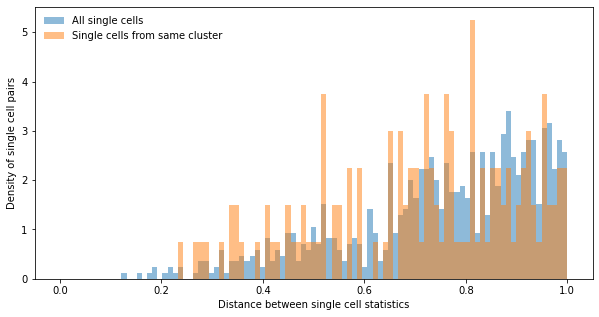

In [732]:
# Hypothesis: Single cells that are part of the same cluster have closer statistics
unique_clusters = np.unique(clusters)
specific_single_cells = {c : np.where(clusters == c)[0] for c in unique_clusters if cluster_sizes[c] < 150}

p = pdist(single_cell_results[:,0,:].astype(float))
dists = squareform(p)
dists = np.where(dists == 0, np.nan, dists)
dists = np.where(dists == np.inf, np.nan, dists)

inner_cluster_similarity = {}
for c in tqdm(unique_clusters):
    if cluster_sizes[c] > 150: continue
    inds = np.where(clusters == c)[0]
    tri = np.triu(dists[inds,:][:,inds]).flatten()
    tri = tri[np.where(np.isnan(tri) == False)[0]]
    tri = tri[np.where(tri != 0)[0]]
    inner_cluster_similarity[c] = tri

all_inner_cluster_similarity = np.concatenate([a for a in inner_cluster_similarity.values()])

tri = np.triu(dists).flatten()
tri = tri[np.where(np.isnan(tri) == False)[0]]
tri = tri[np.where(tri != 0)[0]]

plt.figure(figsize=(10,5))
plt.hist(tri, bins=np.linspace(0,1,100), density=True, alpha=0.5, label='All single cells')
plt.hist(all_inner_cluster_similarity, bins=np.linspace(0,1,100), density=True, alpha=0.5, label='Single cells from same cluster')
print('')
plt.xlabel('Distance between single cell statistics')
plt.ylabel('Density of single cell pairs')
plt.legend(frameon=False)

from scipy.stats import ttest_ind 
print(ttest_ind(tri, all_inner_cluster_similarity))

In [731]:
results[:,2,:]

array([[0.688248  , 0.73561859, 0.90203444, 0.75446097],
       [0.65039968, 0.60735202, 0.88762784, 0.6085434 ],
       [0.45674345, 0.41369311, 0.85117722, 0.41867797],
       ...,
       [0.3681078 , 0.29998136, 0.81684399, 0.38217449],
       [0.53479703, 0.42444028, 0.86485036, 0.48106776],
       [0.76355023, 0.78755559, 0.95051988, 0.78472339]])

In [ ]:
# Hypothesis: whole images that are part of the same single cell cluster have closer statistics
unique_clusters = np.unique(clusters)
specific_single_cells = {c : np.where(clusters == c)[0] for c in unique_clusters if cluster_sizes[c] < 150}

p = pdist(results[:,2,:].astype(float))
dists = squareform(p)
dists = np.where(dists == 0, np.nan, dists)
dists = np.where(dists == np.inf, np.nan, dists)

inner_cluster_similarity = {}
for c in tqdm(unique_clusters):
    if cluster_sizes[c] > 150: continue
    if unique_whole_images[c] < 2: continue
    inds = np.where(pd.DataFrame(whole_images, columns=['ID']).ID.isin(specific_whole_images[c]))[0]
    tri = np.triu(dists[inds,:][:,inds]).flatten()
    tri = tri[np.where(np.isnan(tri) == False)[0]]
    tri = tri[np.where(tri != 0)[0]]
    inner_cluster_similarity[c] = tri

all_inner_cluster_similarity = np.concatenate([a for a in inner_cluster_similarity.values()])

tri = np.triu(dists).flatten()
tri = tri[np.where(np.isnan(tri) == False)[0]]
tri = tri[np.where(tri != 0)[0]]

plt.figure(figsize=(10,5))
plt.hist(tri, bins=np.linspace(0,100,100), density=True, alpha=0.5, label='All whole images')
plt.hist(all_inner_cluster_similarity, bins=np.linspace(0,100,100), density=True, alpha=0.5, label='Whole images from same cluster')
print('')
plt.xlabel('Distance between whole image statistics')
plt.ylabel('Density of whole image pairs')
plt.legend(frameon=False)


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 193/193 [00:00<00:00, 1362.64it/s]



Ttest_indResult(statistic=30.04986934693916, pvalue=2.2752258649089574e-198)


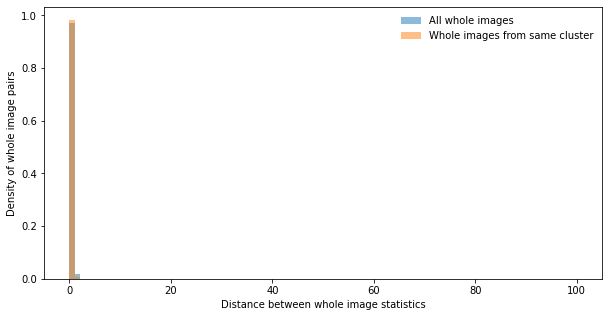

In [702]:
# Hypothesis: whole images that are part of the same single cell cluster have closer statistics
unique_clusters = np.unique(clusters)
specific_whole_images = {c : df.iloc[np.where(clusters == c)[0]].ID.unique() for c in unique_clusters if cluster_sizes[c] < 150}

p = pdist(results[:,2,:].astype(float))
dists = squareform(p)
dists = np.where(dists == 0, np.nan, dists)
dists = np.where(dists == np.inf, np.nan, dists)

inner_cluster_similarity = {}
for c in tqdm(unique_clusters):
    if cluster_sizes[c] > 150: continue
    if unique_whole_images[c] < 2: continue
    inds = np.where(pd.DataFrame(whole_images, columns=['ID']).ID.isin(specific_whole_images[c]))[0]
    tri = np.triu(dists[inds,:][:,inds]).flatten()
    tri = tri[np.where(np.isnan(tri) == False)[0]]
    tri = tri[np.where(tri != 0)[0]]
    inner_cluster_similarity[c] = tri

all_inner_cluster_similarity = np.concatenate([a for a in inner_cluster_similarity.values()])

tri = np.triu(dists).flatten()
tri = tri[np.where(np.isnan(tri) == False)[0]]
tri = tri[np.where(tri != 0)[0]]

plt.figure(figsize=(10,5))
plt.hist(tri, bins=np.linspace(0,100,100), density=True, alpha=0.5, label='All whole images')
plt.hist(all_inner_cluster_similarity, bins=np.linspace(0,100,100), density=True, alpha=0.5, label='Whole images from same cluster')
print('')
plt.xlabel('Distance between whole image statistics')
plt.ylabel('Density of whole image pairs')
plt.legend(frameon=False)

from scipy.stats import ttest_ind 
print(ttest_ind(tri, all_inner_cluster_similarity))

In [707]:
results[:,2,:]

array([[0.688248  , 0.73561859, 0.90203444, 0.75446097],
       [0.65039968, 0.60735202, 0.88762784, 0.6085434 ],
       [0.45674345, 0.41369311, 0.85117722, 0.41867797],
       ...,
       [0.3681078 , 0.29998136, 0.81684399, 0.38217449],
       [0.53479703, 0.42444028, 0.86485036, 0.48106776],
       [0.76355023, 0.78755559, 0.95051988, 0.78472339]])

In [143]:
#Hypothesis: single cells from the same whole image that are in different clusters have important differences between them
whole_images_from_both_big_and_small = [w for w in whole_images if w in all_unique_clusters and all_unique_clusters[w] > 1]
whole_images_from_both_big_and_small = [w for w in whole_images_from_both_big_and_small if 0 in np.unique(clusters[group_dict[w]]) ]


In [765]:
len(whole_images_from_both_big_and_small)

377

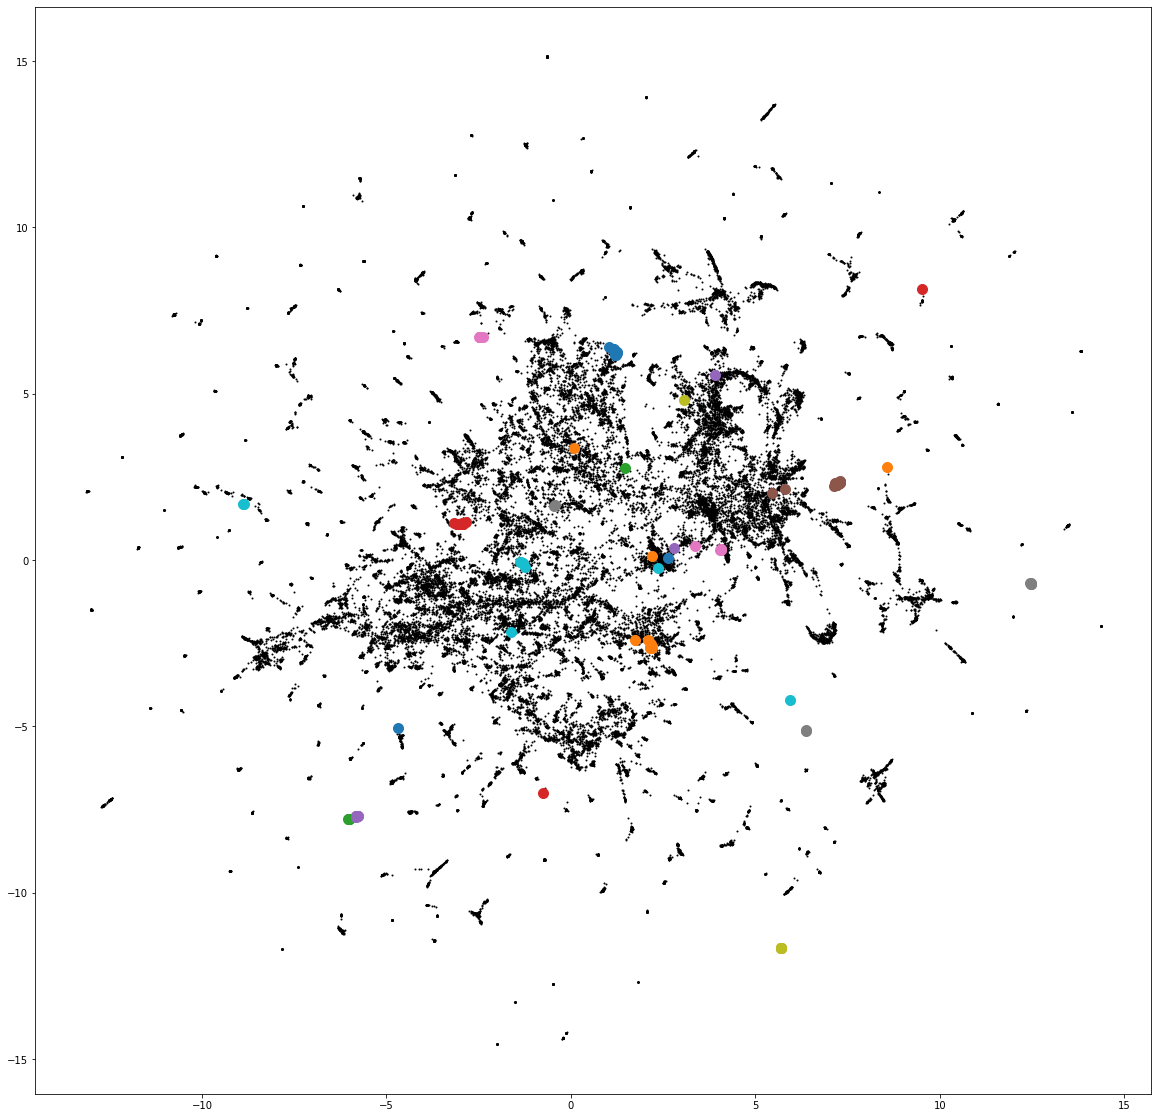

In [148]:
plt.figure(figsize=(20,20))

plt.scatter(embedding[:,0],
           embedding[:,1],
           s=1, color='black')

for w in whole_images_from_both_big_and_small[:10]:
    inds = group_dict[w]
    plt.scatter(embedding[inds,0],
               embedding[inds,1],
               s=100)
    
        

In [779]:
whole_images_from_both_big_and_small[0]

'01a2514a-bba7-11e8-b2ba-ac1f6b6435d0'

In [782]:
inds

Int64Index([44951, 44952, 44953, 44954, 44955, 44956, 44957, 44958, 44959,
            44960, 44961, 44962, 44963, 44964, 44965, 44966, 44967, 44968,
            44969, 44970, 44971, 44972],
           dtype='int64')

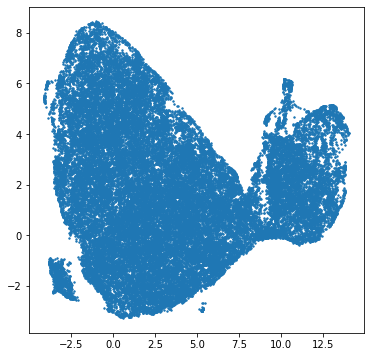

In [787]:
d_no_norm_not_converged, e_no_norm_not_converged = load_and_project('/scr/mdoron/Dino4Cells/models/without-norm-fixed-masked-mom-0.996-epoch-100_A549_reproduction/features.pth')

/scr/mdoron/miniconda3/lib/python3.9/site-packages/sklearn/manifold/_spectral_embedding.py:374: UserWarning: Exited at iteration 85 with accuracies 
[2.51861298e-14 4.50192924e-06 2.22582792e-05 7.85711273e-06]
not reaching the requested tolerance 1e-05.
  _, diffusion_map = lobpcg(


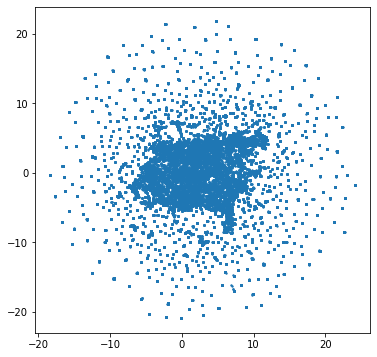

In [786]:
d_no_norm, e_no_norm = load_and_project('/scr/mdoron/Dino4Cells/models/without-norm-fixed-masked-mom-0.996-epoch-100_A549_reproduction_exact_old_code/features.pth')

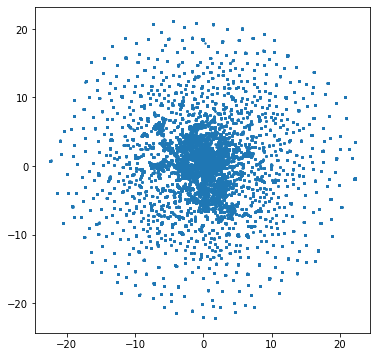

In [250]:
d, e = load_and_project('/scr/mdoron/Dino4Cells/models/with-norm-fixed-masked-mom-0.996-epoch-100_A549_reproduction_exact_old_code/features.pth')

In [ ]:
no_norm_features_other_data, no_norm_embeddings_other_data = load_and_project('/scr/mdoron/Dino4Cells/models/without-norm-fixed-masked-mom-0.996-epoch-100_A549_reproduction_exact/exp06_features.pth')

In [ ]:
a,b = torch.load('/scr/mdoron/Dino4Cells/models/without-norm-fixed-masked-mom-0.996-epoch-100_A549_reproduction_exact/exp06_features.pth')


In [1]:
len(e)

NameError: name 'e' is not defined

In [ ]:
embedding = no_norm_embeddings_other_data
a,b,c,d = torch.load('/scr/mdoron/Dino4Cells/models/without-norm-fixed-masked-mom-0.996-epoch-100_A549_reproduction_exact/other_data_features.pth')
protein_matrix = torch.stack(b)

plt.figure(figsize=(10,10))
for i in range(28):
    indices = np.where(protein_matrix[:,i])[0]
    plt.scatter(embedding[indices,0], embedding[indices,1], s=0.5,
               color=cmap(float(i / 28)),)
plt.axis('off')


In [ ]:
embedding = no_norm_embeddings_other_data
a,b,c,d = torch.load('/scr/mdoron/Dino4Cells/models/without-norm-fixed-masked-mom-0.996-epoch-100_A549_reproduction_exact/other_data_features.pth')
protein_matrix = torch.stack(b)

plt.figure(figsize=(10,10))
for i in range(28):
    indices = np.where(protein_matrix[:,i])[0]
    plt.scatter(embedding[indices,0], embedding[indices,1], s=0.5,
               color=cmap(float(i / 28)),)
plt.axis('off')


In [ ]:
no_norm_features, no_norm_embeddings = load_and_project('/scr/mdoron/Dino4Cells/models/without-norm-fixed-masked-mom-0.996-epoch-100_A549_reproduction_exact/features.pth')

In [ ]:
no_norm_features, no_norm_embeddings = load_and_project_michael('/scr/mdoron/Dino4Cells/models/with-norm-fixed-masked-mom-0.996-epoch-100_A549_reproduction/features.pth')


In [ ]:
no_norm_features_michael, no_norm_embeddings_michael = load_and_project_michael('/scr/mdoron/Dino4Cells/models/without-norm-fixed-masked-mom-0.996-epoch-100_A549_reproduction/features.pth')


In [ ]:
no_norm_features_juan, no_norm_embeddings_juan = load_and_project('/scr/mdoron/Dino4Cells/models/without-norm-fixed-masked-mom-0.996-epoch-100_A549_reproduction/features.pth')


In [ ]:
norm_features, norm_embeddings = load_and_project('/scr/mdoron/Dino4Cells/reproduction_norm_features.pth')

In [ ]:
norm_200k_model_features_michael, norm_200k_model_embeddings_michael = load_and_project_michael('/scr/mdoron/Dino4Cells/models/with-norm-varied-masked-mom-0.996-epoch-100/features.pth')
norm_200k_model_features_juan, norm_200k_model_embeddings_juan = load_and_project('/scr/mdoron/Dino4Cells/models/with-norm-varied-masked-mom-0.996-epoch-100/features.pth')
no_norm_200k_model_features_juan, no_norm_200k_model_embeddings_juan = load_and_project('/scr/mdoron/Dino4Cells/models/without-norm-varied-masked-mom-0.996-epoch-100/features.pth')

In [ ]:
no_norm_200k_model_features_michael, no_norm_200k_model_embeddings_michael = load_and_project_michael('/scr/mdoron/Dino4Cells/models/without-norm-varied-masked-mom-0.996-epoch-100/features.pth')



In [ ]:
no_norm_200k_model_features, no_norm_200k_model_embeddings = load_and_project('/scr/mdoron/Dino4Cells/models/without-norm-varied-masked-mom-0.996-epoch-100/features.pth')


In [ ]:
vit_base_model_features, vit_base_model_embeddings = load_and_project('/scr/mdoron/Dino4Cells/models/without-norm-varied-masked-mom-0.996-epoch-100_vit_base_HPA/features.pth')


In [ ]:
vit_base_model_features, vit_base_model_embeddings = load_and_project_michael('/scr/mdoron/Dino4Cells/models/without-norm-varied-masked-mom-0.996-epoch-100_vit_base_HPA/features.pth')


In [10]:

import umap
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
cmap = cm.nipy_spectral
# a_wo,b_wo,c_wo,d_wo = torch.load('/scr/mdoron/Dino4Cells/models/without-norm-varied-masked-mom-0.996-epoch-100_vit_base_HPA/features.pth')
# embedding = vit_base_model_embeddings


In [ ]:
# unique_cell_types = np.unique(c_wo)
# labels = sorted(protein_to_num_single_cells.keys())
# # protein_matrix = pd.read_csv('/scr/mdoron/Dino4Cells/data/varied_size_masked_single_cells_for_sc.csv')[labels].values.astype(int)

plt.figure(figsize=(10,10))
for i in range(len(unique_cell_types)):
    indices = np.where(np.array(c_wo) == unique_cell_types[i])
    plt.scatter(embedding[indices,0], 
                embedding[indices,1], 
                s=0.01,
                color=cmap(float(i / len(unique_cell_types))),
                label=unique_cell_types[i])
plt.axis('off')
lgnd = plt.legend(frameon=False, bbox_to_anchor=[0.5, 1.1], loc='lower center', ncol=3)
for l in lgnd.legendHandles:
    l._sizes = [30]


mapping_dict = protein_to_num_single_cells
target_labels = (list(mapping_dict.keys()))
mapping = np.arange(19)
for ind, p in enumerate(list(mapping_dict.keys())):
    mapping[ind] = target_labels.index(p)
protein_matrix = torch.stack(b_wo)[:, mapping]

plt.figure(figsize=(10,10))
for i in range(19):
    indices = np.where(protein_matrix[:,i])[0]
    plt.scatter(embedding[indices,0], embedding[indices,1], s=0.01,
               color=cmap(float(i / 19)),
               label=labels[i])
plt.axis('off')
lgnd = plt.legend(frameon=False, bbox_to_anchor=[0.5, 1.1], loc='lower center', ncol=3)
for l in lgnd.legendHandles:
    l._sizes = [30]



In [ ]:
plt.figure(figsize=(6,6))
plt.scatter(norm_200k_model_embeddings[:,0], norm_200k_model_embeddings[:,1], s=0.001)
plt.show()


In [ ]:
plt.figure(figsize=(6,6))
plt.scatter(no_norm_200k_model_embeddings[:,0], no_norm_200k_model_embeddings[:,1], s=0.001)
plt.show()


In [ ]:
plt.figure(figsize=(6,6))
plt.scatter(no_norm_embeddings[:,0], no_norm_embeddings[:,1], s=0.001)
plt.show()


In [ ]:
plt.figure(figsize=(6,6))
plt.scatter(norm_embeddings[:,0], norm_embeddings[:,1], s=0.001)
plt.show()


In [ ]:
features["exp05"] = np.concatenate((features["exp02"], features["exp03"]), axis=1)
reducer = umap.UMAP()
embeddings["exp05"] = reducer.fit_transform(features["exp05"])
plt.figure(figsize=(6,6))
plt.scatter(embeddings["exp05"][:,0], embeddings["exp05"][:,1], s=2)
plt.show()

In [ ]:
# Parse labels
labels = list(df['protein_location'].apply(eval))
label_set = set()
for l in labels:
    label_set = label_set.union(set(l))

for l in label_set:
    df[l] = False

for k in df.index:
    for l in labels[k]:
        df.loc[k, l] = True

In [ ]:
def show_tag(df, e, tag):
    df["X"] = e[:,0]
    df["Y"] = e[:,1]
    plt.figure(figsize=(6,6))
    sb.scatterplot(data=df, x="X", y="Y", hue=tag, s=2)
    plt.show()

In [ ]:
for tag in label_set:
    show_tag(df, embeddings["exp01"], tag)

In [ ]:
def cossim(A, B):
    C = np.dot(A, B.T)
    An = np.linalg.norm(A, axis=1)
    Bn = np.linalg.norm(B, axis=1)
    cos = C / (An[:,np.newaxis] @ Bn[:,np.newaxis].T)
    return cos

In [ ]:
def cluster_similarities(F, df):
    C = cossim(F, F)
    avg = np.mean(C[np.triu_indices(C.shape[0], 1)])
    std = np.mean(C[np.triu_indices(C.shape[0], 1)])
    results = {"average": avg, "std": std}
    for tag in tqdm.tqdm(label_set):
        idx = list(df[df[tag]].index)
        V = C[idx,:][:,idx]
        val = np.mean(V[np.triu_indices(V.shape[0], 1)])
        results[tag] =  val
    return results

In [ ]:
import tqdm

In [ ]:
# exp01: Two channels at a time
# exp02: All channels (regular)
# exp03: Protein channel only
# exp04: One channel at a time
# exp05: All channels + protein

experiments = ["exp01", "exp02", "exp03", "exp04", "exp05"]
stats = {}
for e in experiments:
    print(e)
    r = cluster_similarities(features[e], df)
    stats[e] = pd.DataFrame(data=r.values(), index=r.keys(), columns=[e])

In [ ]:
R = pd.concat(stats.values(), axis=1)
sb.barplot(data=R[R.index != "average"])

In [ ]:
plt.figure(figsize=(12,6))
y_pos = range(len(R.index))
plt.bar(y_pos, R["exp01"], color="blue", alpha=0.6)
plt.bar(y_pos, R["exp03"], color="green", alpha=0.6)
plt.bar(y_pos, R["exp05"], color="purple", alpha=0.6)
plt.bar(y_pos, R["exp04"], color="red", alpha=0.6)
plt.bar(y_pos, R["exp02"], color="orange", alpha=0.6)

plt.axhline(y=R.loc["average","exp01"], color="blue")
plt.axhline(y=R.loc["average","exp03"], color="green")
plt.axhline(y=R.loc["average","exp05"], color="purple")
plt.axhline(y=R.loc["average","exp04"], color="red")
plt.axhline(y=R.loc["average","exp02"], color="orange")

xt = plt.xticks(y_pos, R.index, rotation=90)

In [ ]:
plt.bar(list(R.columns), R[R.index != "average"].mean())
plt.bar(list(R.columns), list(R.iloc[0]))

In [26]:
a,b,c,d = torch.load('/scr/mdoron/Dino4Cells/models/whole_image_model/features.pth')

In [28]:
a

tensor([[ 0.9865, -0.6818,  1.6655,  ..., -1.4508, -0.4812,  1.2594],
        [ 0.9865, -0.6818,  1.6655,  ..., -1.4508, -0.4812,  1.2594],
        [ 0.9865, -0.6818,  1.6655,  ..., -1.4508, -0.4812,  1.2594],
        ...,
        [ 1.4595,  2.6953,  0.4031,  ...,  0.8445, -2.1108,  1.2455],
        [ 1.4595,  2.6953,  0.4031,  ...,  0.8445, -2.1108,  1.2455],
        [ 1.4595,  2.6953,  0.4031,  ...,  0.8445, -2.1108,  1.2455]])